In [1]:
# for QR codes use inline
%matplotlib inline
qr_setting = 'url'
#
# for lecture use notebook
# %matplotlib notebook
# qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
from importlib import reload
from datetime import datetime

import array_to_latex as a2l

def ltx_array_fmt(x, fmt):
    '''converts a numpy array to a latex array'''
    return a2l.to_ltx(x, frmt = fmt, row = False, print_out = False)

def int_fmt(x):
    return ltx_array_fmt(x, '{:d}')

def float_fmt(x):
    return ltx_array_fmt(x, '{:f}')

from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# The Matrix of a Linear Transformation

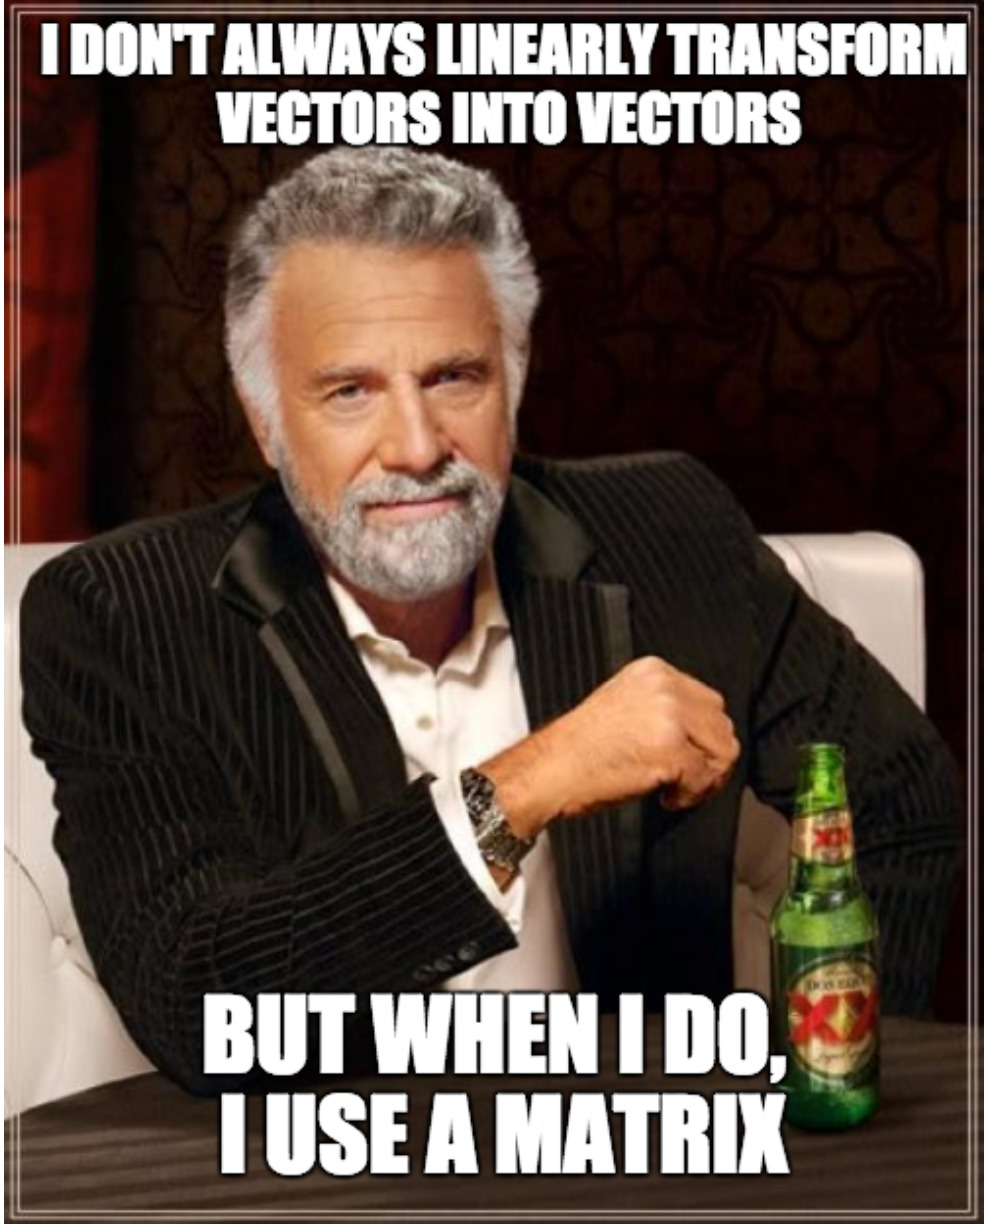

In [2]:
# image credit: https://imgflip.com/memetemplate/The-Most-Interesting-Man-In-The-World
display(Image("images/Dos-Equis-Linear-Transform.jpg", width=350))

In the last lecture we introduced the idea of a __linear transformation__:

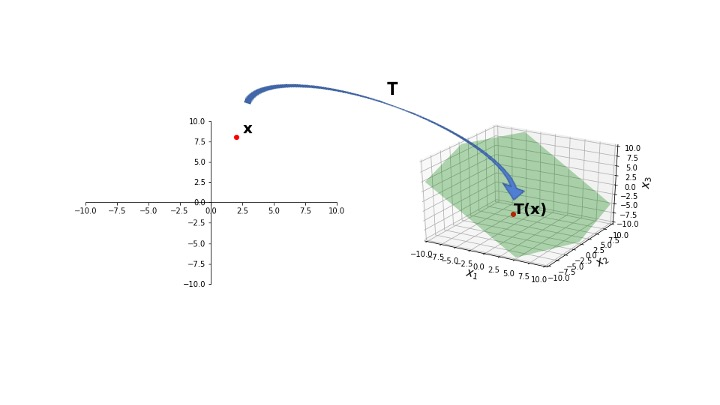

In [3]:
# image credit: Lay, 4th edition
display(Image("images/L7 F4.jpg", width=650))

We have seen that every matrix multiplication is a linear transformation from vectors to vectors.

But, are there any other possible linear transformations from vectors to vectors?

No. 

In other words, the reverse statement is also true:  

> <font color = "blue"> every linear transformation from vectors to vectors is a matrix multiplication. </font>

We'll now prove this fact.   

We'll do it __constructively__, meaning we'll actually show how to find the matrix corresponding to any given linear transformation $T$.

__Theorem.__  Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a linear transformation.   Then there is (always) a unique matrix $A$ such that:

$$ T({\bf x}) = A{\bf x} \;\;\; \mbox{for all}\; {\bf x} \in \mathbb{R}^n.$$

In fact, $A$ is the $m \times n$ matrix whose $j$th column is the vector $T({\bf e_j})$, where ${\bf e_j}$ is the $j$th column of the identity matrix in $\mathbb{R}^n$:

$$A = \left[T({\bf e_1}) \dots T({\bf e_n})\right].$$

$A$ is called the _standard matrix_ of $T$.

__Proof.__  Write 

$${\bf x} = I{\bf x} = \left[{\bf e_1} \dots {\bf e_n}\right]\bf x$$

$$ = x_1{\bf e_1} + \dots + x_n{\bf e_n}.$$

In other words, for any $\mathbf{x}$, we can always expand it as:
    
$$ \mathbf{x} 
\;= \;\;\;\;\;
\begin{bmatrix}
1 & 0 & \dots & 0 \\
0 & 1 & \dots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & 1 
\end{bmatrix} \; \begin{bmatrix}x_1\\x_2\\ \vdots \\ x_n\end{bmatrix} 
\;\;\;\;\;= \;\;\;\;\;
\begin{bmatrix} x_1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} +
\begin{bmatrix} 0 \\ x_2 \\ \vdots \\ 0 \end{bmatrix} +
\dots +
\begin{bmatrix} 0 \\ 0 \\ \vdots \\ x_n \end{bmatrix} $$

Because $T$ is linear, we have:

$$ T({\bf x}) = T(x_1{\bf e_1} + \dots + x_n{\bf e_n})$$

$$ = x_1T({\bf e_1}) + \dots + x_nT({\bf e_n})$$

$$ = \left[T({\bf e_1}) \dots T({\bf e_n})\right] \, \left[\begin{array}{r}x_1\\\vdots\\x_n\end{array}\right] = A{\bf x}.$$

So ... we see that the ideas of __matrix multiplication__ and __linear transformation__ are essentially equivalent when applied to vectors.

Every matrix multiplication is a linear transformation, and every linear transformation from vectors to vectors is a matrix multiplication.

__However__, term _linear transformation_ focuses on a __property__ of the mapping, while the term _matrix multiplication_ focuses on how such a mapping is __implemented.__

This proof shows us an important idea:

<font color='blue'> To find the standard matrix of a linear transformation, ask what the transformation does to the columns of $I$.</font>

In other words, if $ T(\mathbf{x}) = A\mathbf{x} $, then:

$$A = \left[T({\bf e_1}) \dots T({\bf e_n})\right].$$

This gives us a way to compute the standard matrix of a transformation.

Now, in $\mathbb{R}^2$, $I = \left[\begin{array}{cc}1&0\\0&1\end{array}\right]$.   So:

$$\mathbf{e_1} = \left[\begin{array}{c}1\\0\end{array}\right]\;\;\mbox{and}\;\;\mathbf{e_2} = \left[\begin{array}{c}0\\1\end{array}\right].$$

So to find the matrix of any given linear transformation of vectors in $\mathbb{R}^2$, we only have to know what that transformation does to these two points:

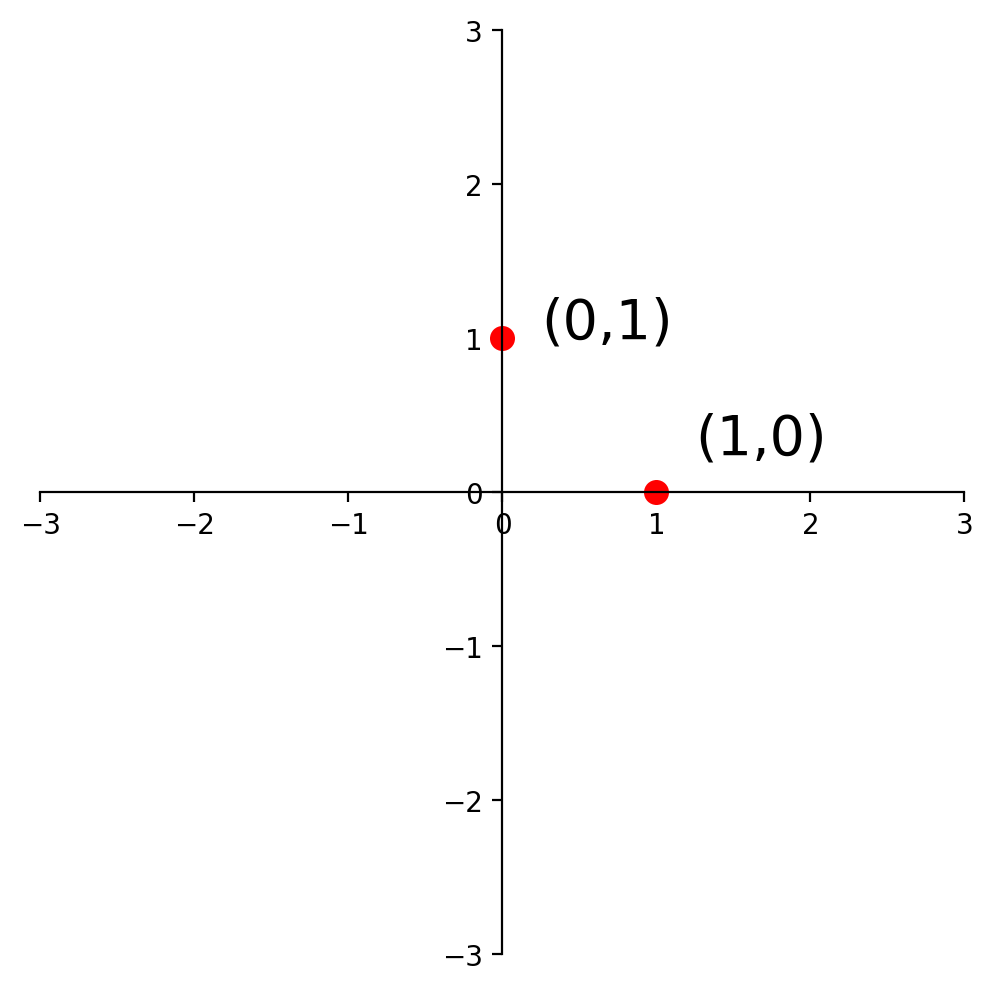

In [4]:
ax = dm.plotSetup(-3,3,-3,3,size=(6,6))
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

This is a __hugely__ powerful tool.  

Let's say we start from some given linear transformation; we can use this idea to find the matrix that implements that linear transformation.  

For example, let's consider rotation about the origin as a kind of transformation.

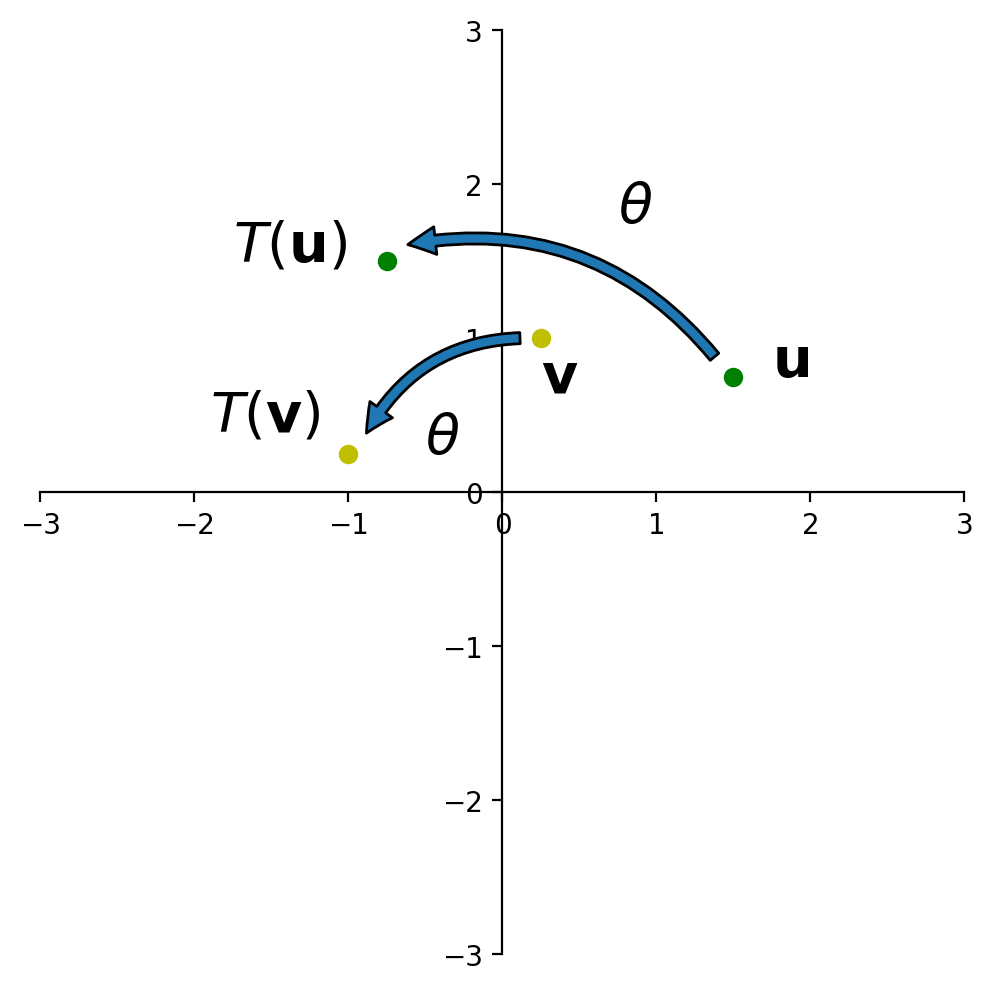

In [5]:
u = np.array([1.5, 0.75])
v = np.array([0.25, 1])
diamond = np.array([[0,0], u,  u+v, v]).T
ax = dm.plotSetup()
plt.plot(u[0], u[1], 'go')
plt.plot(v[0], v[1], 'yo')
ax.text(u[0]+.25,u[1],r'$\bf{u}$',size=20)
ax.text(v[0],v[1]-.35,r'$\bf{v}$',size=20)
rotation = np.array([[0, -1],[1, 0]])
up = rotation @ u
vp = rotation @ v
plt.plot(up[0], up[1], 'go')
plt.plot(vp[0], vp[1], 'yo')
ax.text(up[0]-1,up[1],r'$T(\mathbf{u})$',size=20)
ax.text(vp[0]-.9,vp[1]+.15,r'$T(\mathbf{v})$',size=20)
ax.text(0.75, 1.75, r'$\theta$', size = 20)
ax.text(-.5, 0.25, r'$\theta$', size = 20)
ax.annotate("",
            xy=((up)[0]+.1, (up)[1]+.1), xycoords='data',
            xytext=((u)[0]-.1, (u)[1]+.1), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            )
ax.annotate("",
            xy=((vp)[0]+.1, (vp)[1]+.1), xycoords='data',
            xytext=((v)[0]-.1, (v)[1]), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            );

First things first: Is rotation a __linear__ transformation?

Recall that a for a transformation to be linear, it must be true that $T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v}).$

I'm going to show you a "geometric proof."

This figure shows that "the rotation of $\mathbf{u+v}$ is the sum of the rotation of $\mathbf{u}$ and the rotation of $\mathbf{v}$".

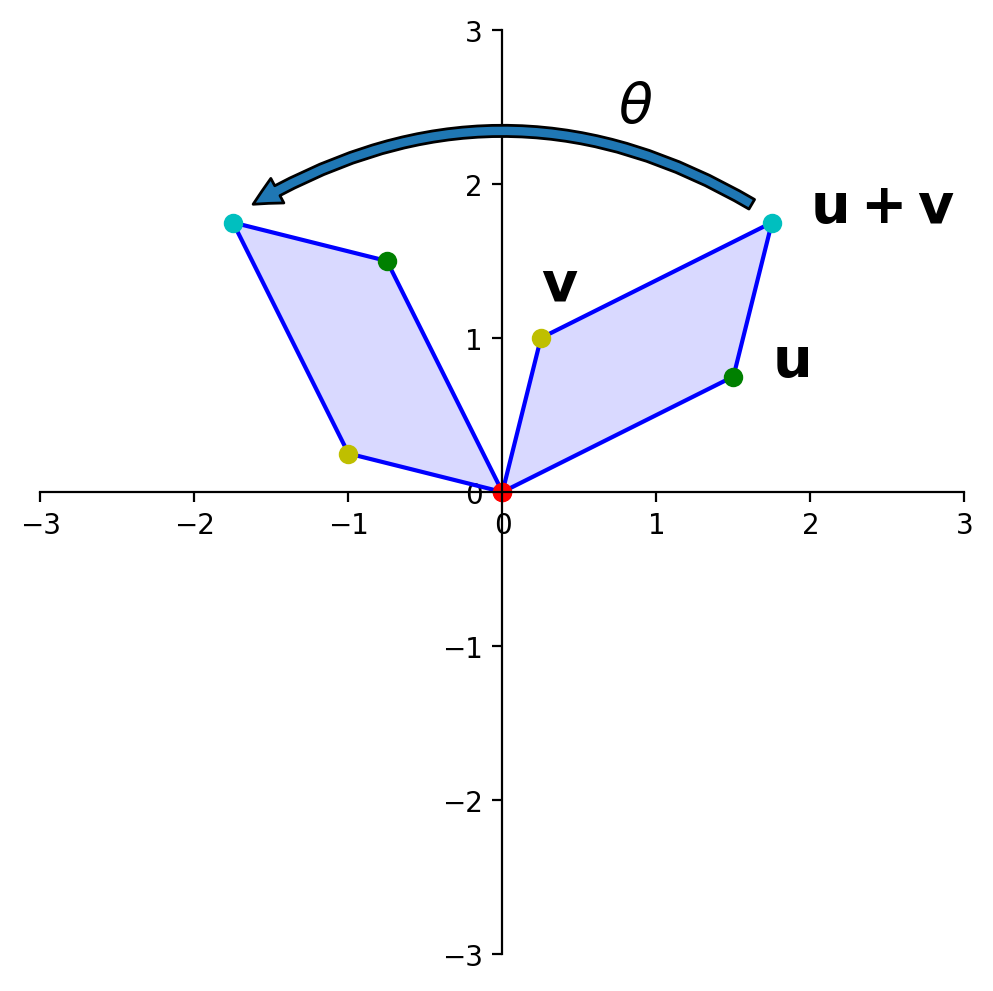

In [6]:
u = np.array([1.5, 0.75])
v = np.array([0.25, 1])
diamond = np.array([[0,0], u,  u+v, v]).T
ax = dm.plotSetup()
dm.plotSquare(diamond)
ax.text(u[0]+.25,u[1],r'$\bf{u}$',size=20)
ax.text(v[0],v[1]+.25,r'$\bf{v}$',size=20)
ax.text(u[0]+v[0]+.25,u[1]+v[1],r'$\bf{u + v}$',size=20)
rotation = np.array([[0, -1],[1, 0]])
up = rotation @ u
vp = rotation @ v
diamond = np.array([[0,0], up,  up+vp, vp]).T
dm.plotSquare(diamond)
ax.text(0.75, 2.4, r'$\theta$', size = 20)
ax.annotate("",
            xy=((up+vp)[0]+.1, (up+vp)[1]+.1), xycoords='data',
            xytext=((u+v)[0]-.1, (u+v)[1]+.1), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            );

OK, so rotation is a linear transformation.  

Let's see how to __compute__ the linear transformation that is a rotation.

__Specifically:__  Let $T: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ be the transformation that rotates each point in $\mathbb{R}^2$ about the origin through an angle $\theta$, with counterclockwise rotation for a positive angle.  

Let's find the standard matrix $A$ of this transformation.

__Solution.__  The columns of $I$ are ${\bf e_1} = \left[\begin{array}{r}1\\0\end{array}\right]$ and ${\bf e_2} = \left[\begin{array}{r}0\\1\end{array}\right].$

Referring to the diagram below, we can see that $\left[\begin{array}{r}1\\0\end{array}\right]$ rotates into $\left[\begin{array}{r}\cos\theta\\\sin\theta\end{array}\right],$ and $\left[\begin{array}{r}0\\1\end{array}\right]$ rotates into $\left[\begin{array}{r}-\sin\theta\\\cos\theta\end{array}\right].$

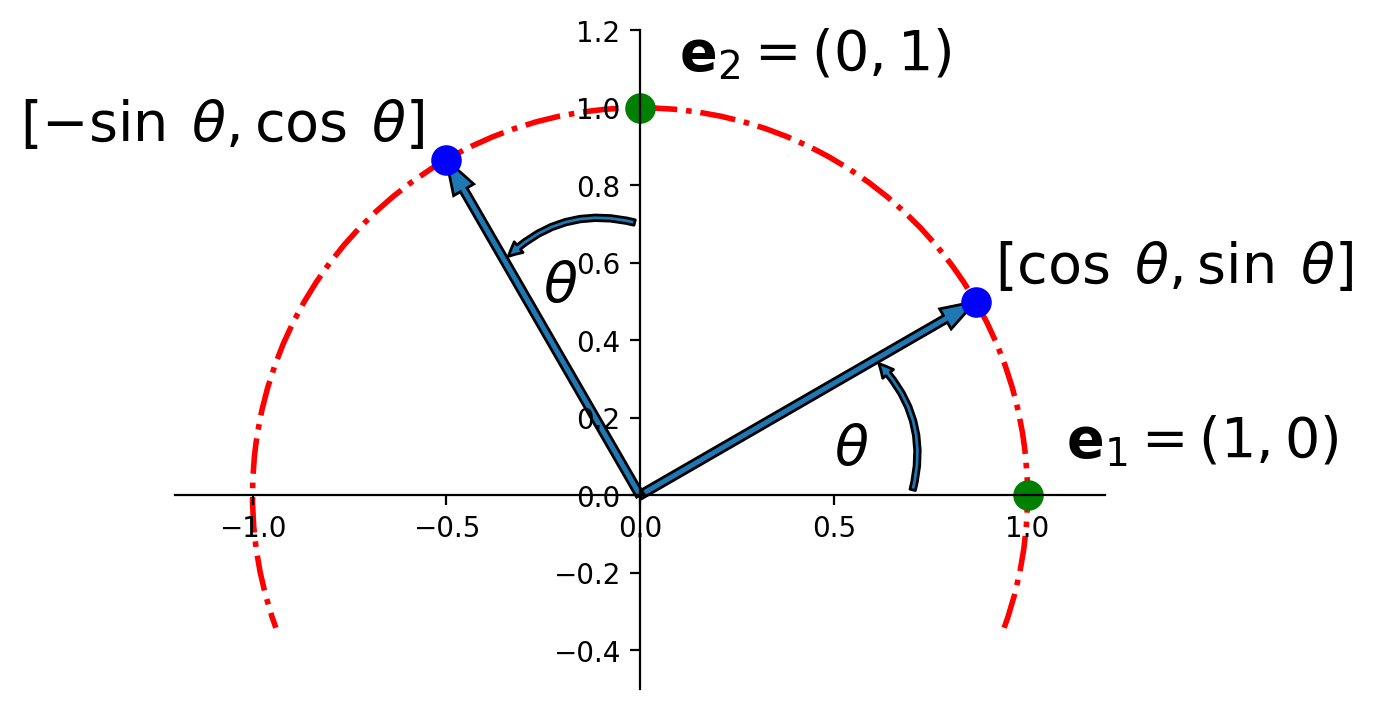

In [7]:
import matplotlib.patches as patches
ax = dm.plotSetup(-1.2, 1.2, -0.5, 1.2)
# red circle portion
arc = patches.Arc([0., 0.], 2., 2., angle = 0., theta1 = 340., 
                 theta2 = 200.,
                 linewidth = 2, color = 'r',
                 linestyle = '-.')
ax.add_patch(arc)
#
# labels
ax.text(1.1, 0.1, r'$\mathbf{e}_1 = (1, 0)$', size = 20)
ax.text(0.1, 1.1, r'$\mathbf{e}_2 = (0, 1)$', size = 20)
#
# angle of rotation and rotated points
theta = np.pi / 6
e1t = [np.cos(theta), np.sin(theta)]
e2t = [-np.sin(theta), np.cos(theta)]
#
# theta labels
ax.text(0.5, 0.08, r'$\theta$', size = 20)
ax.text(-0.25, 0.5, r'$\theta$', size = 20)
#
# arrows from origin
ax.arrow(0, 0, e1t[0], e1t[1],
        length_includes_head = True,
        width = .02)
ax.arrow(0, 0, e2t[0], e2t[1],
        length_includes_head = True,
        width = .02)
#
# new point labels
ax.text(e1t[0]+.05, e1t[1]+.05, r'$[\cos\; \theta, \sin \;\theta]$', size = 20)
ax.text(e2t[0]-1.1, e2t[1]+.05, r'$[-\sin\; \theta, \cos \;\theta]$', size = 20)
#
# curved arrows showing rotation
ax.annotate("",
            xytext=(0.7, 0), xycoords='data',
            xy=(0.7*e1t[0], 0.7*e1t[1]), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            )
ax.annotate("",
            xytext=(0, 0.7), xycoords='data',
            xy=(0.7*e2t[0], 0.7*e2t[1]), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3"),
            )
#
# new points
plt.plot([e1t[0], e2t[0]], [e1t[1], e2t[1]], 'bo', markersize = 10)
plt.plot([0, 1], [1, 0], 'go', markersize = 10);

So by the Theorem above, 

$$ A = \left[\begin{array}{rr}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{array}\right].$$

To demonstrate the use of a rotation matrix, let's rotate the following shape:

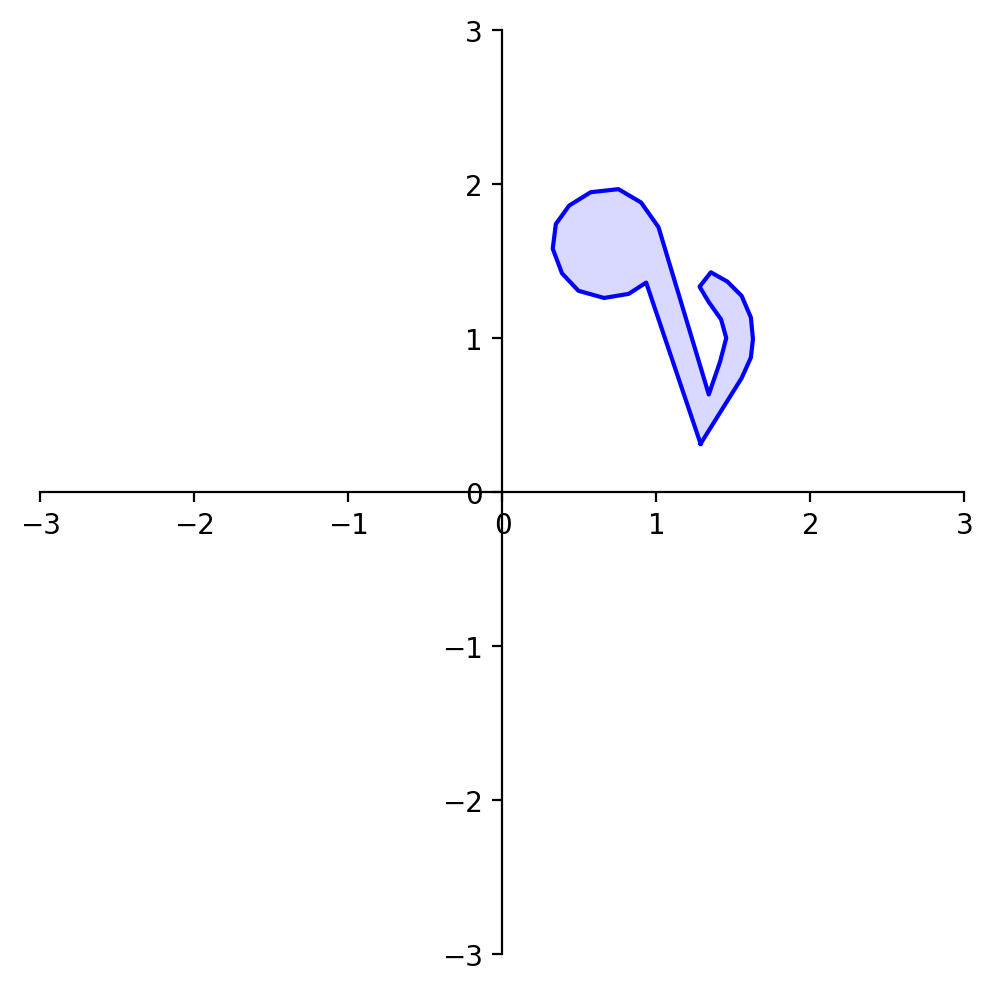

In [8]:
dm.plotSetup()
note = dm.mnote()
dm.plotShape(note)

The variable `note` is a array of 26 vectors in $\mathbb{R}^2$ that define its shape.   

In other words, it is a 2 $\times$ 26 matrix.

To rotate `note` we need to multiply each column of `note` by the rotation matrix $A$.

In Python this can be performed using the `@` operator.  

That is, if `A` and `B` are matrices,

`A @ B`

will multiply `A` by every column of `B,` and the resulting vectors will be formed
into a matrix.

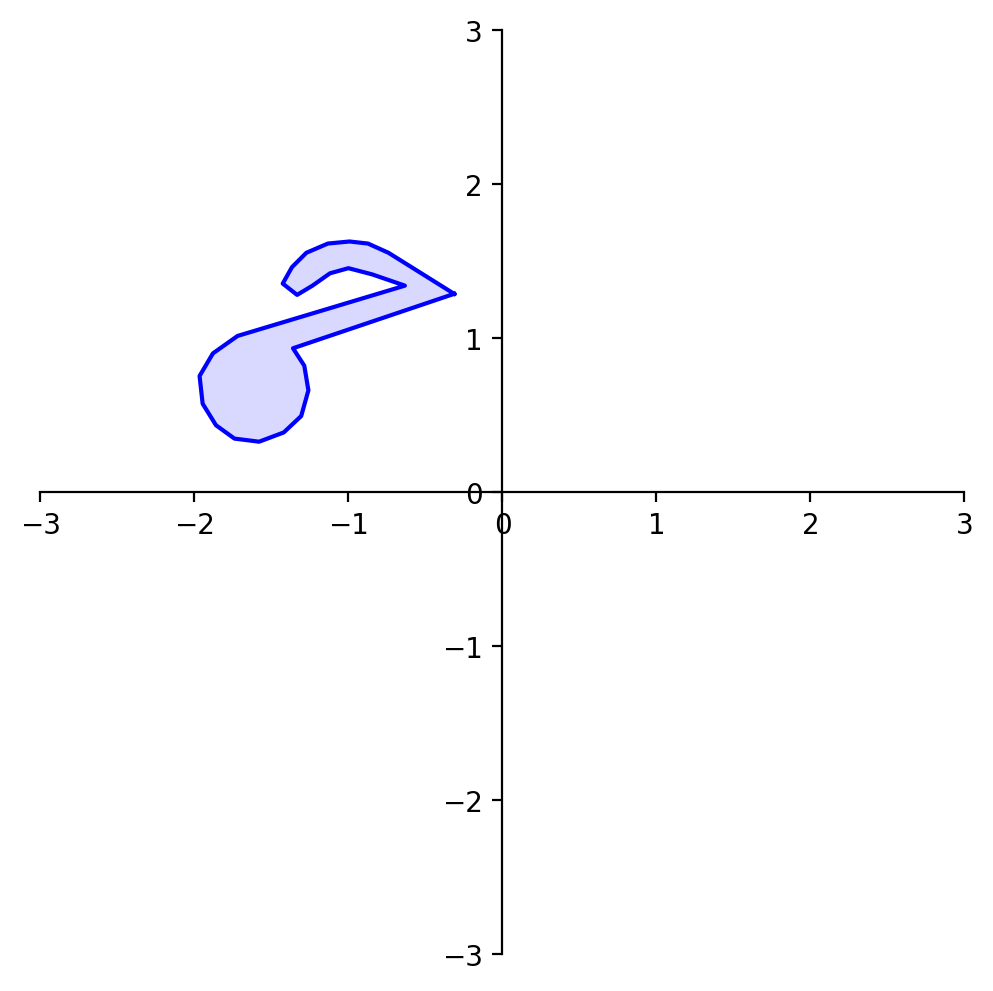

In [9]:
dm.plotSetup()
angle = 90
theta = (angle/180) * np.pi
A = np.array(
    [[np.cos(theta), -np.sin(theta)],
     [np.sin(theta), np.cos(theta)]])
rnote = A @ note
dm.plotShape(rnote)

## Geometric Linear Transformations of $\mathbb{R}^2$

Let's use our understanding of how to construct linear transformations to look at some specific linear transformations of $\mathbb{R}^2$ to $\mathbb{R}^2$.

First, let's recall the linear transformation 

$$T(\mathbf{x}) = r\mathbf{x}.$$

With $r > 1$, this is a dilation.  It moves every vector further from the origin.  

Let's say the dilation is by a factor of 2.5.

To construct the matrix $A$ that implements this transformation, we ask: where do ${\bf e_1}$ and ${\bf e_2}$ go?

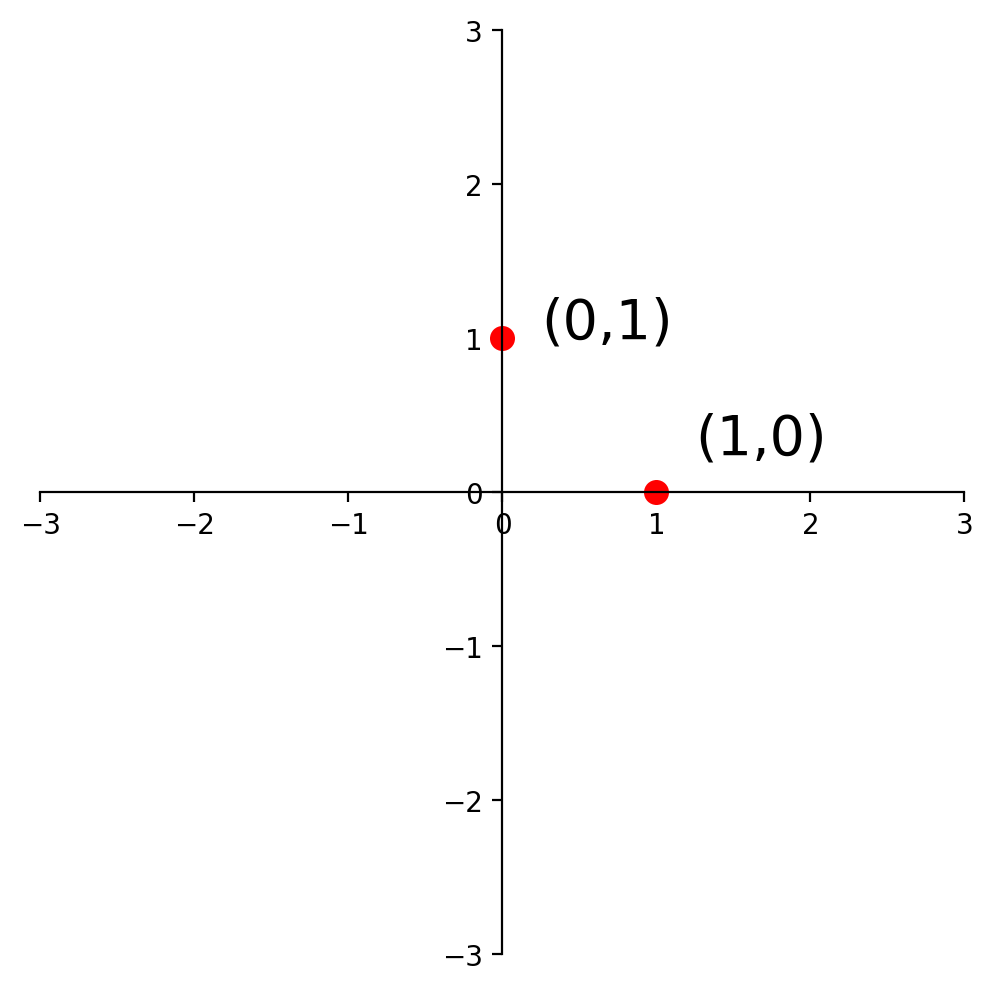

In [10]:
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

Under the action of $A$, $\mathbf{e_1}$ goes to $\left[\begin{array}{c}2.5\\0\end{array}\right]$ and $\mathbf{e_2}$ goes to $\left[\begin{array}{c}0\\2.5\end{array}\right]$.

So the matrix $A$ must be $\left[\begin{array}{cc}2.5&0\\0&2.5\end{array}\right]$.

Let's test this out:

<IPython.core.display.Latex object>

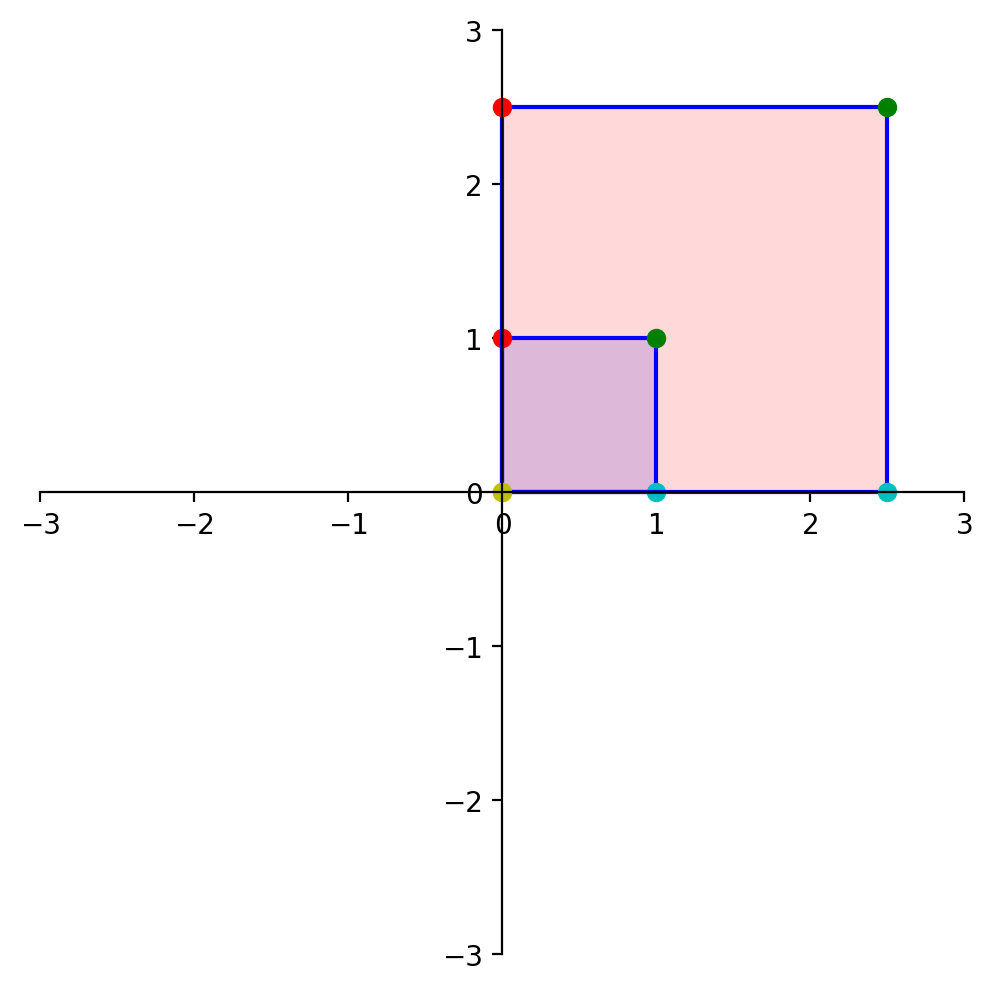

In [11]:
square = np.array(
    [[0,1,1,0],
     [1,1,0,0]])
A = np.array(
    [[2.5, 0],
     [0, 2.5]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:1.1f}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')

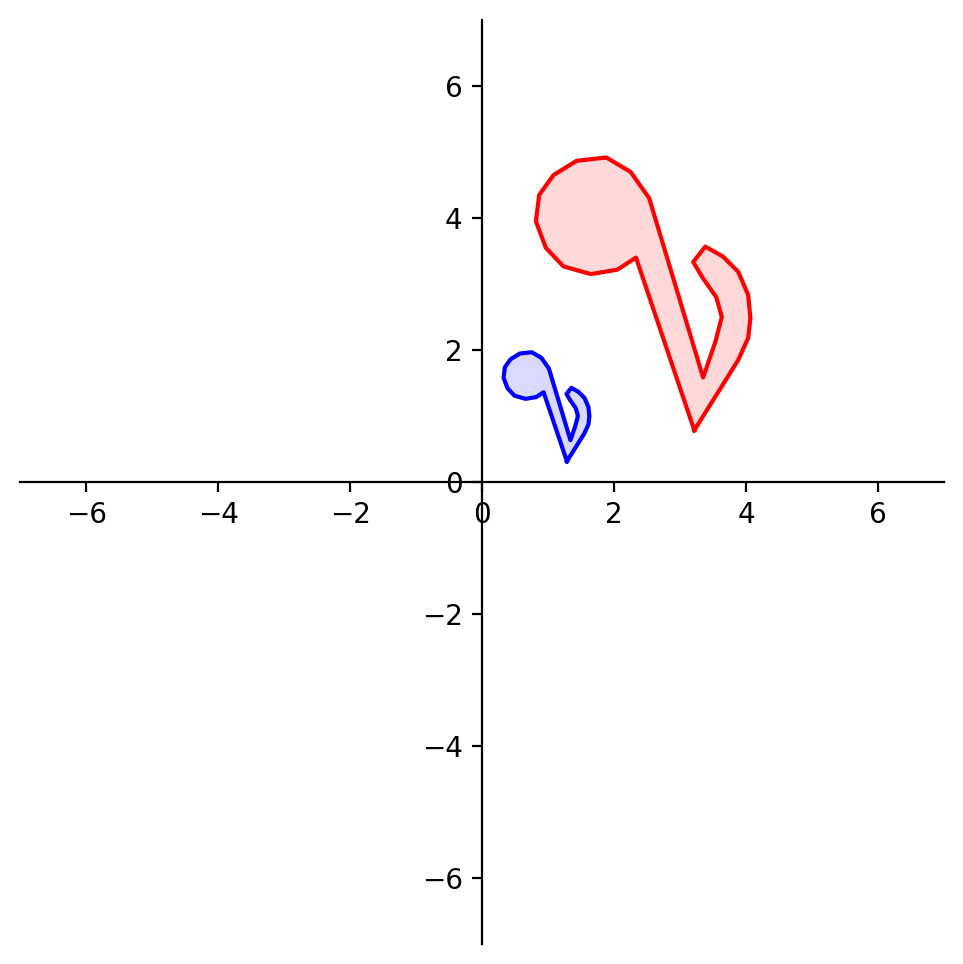

In [12]:
dm.plotSetup(-7,7,-7, 7)
dm.plotShape(note)
dm.plotShape(A @ note,'r')

``` {toggle}
Question Time! Q8.1
```

OK, now let's reflect through the $x_1$ axis.   Where do ${\bf e_1}$ and ${\bf e_2}$ go?

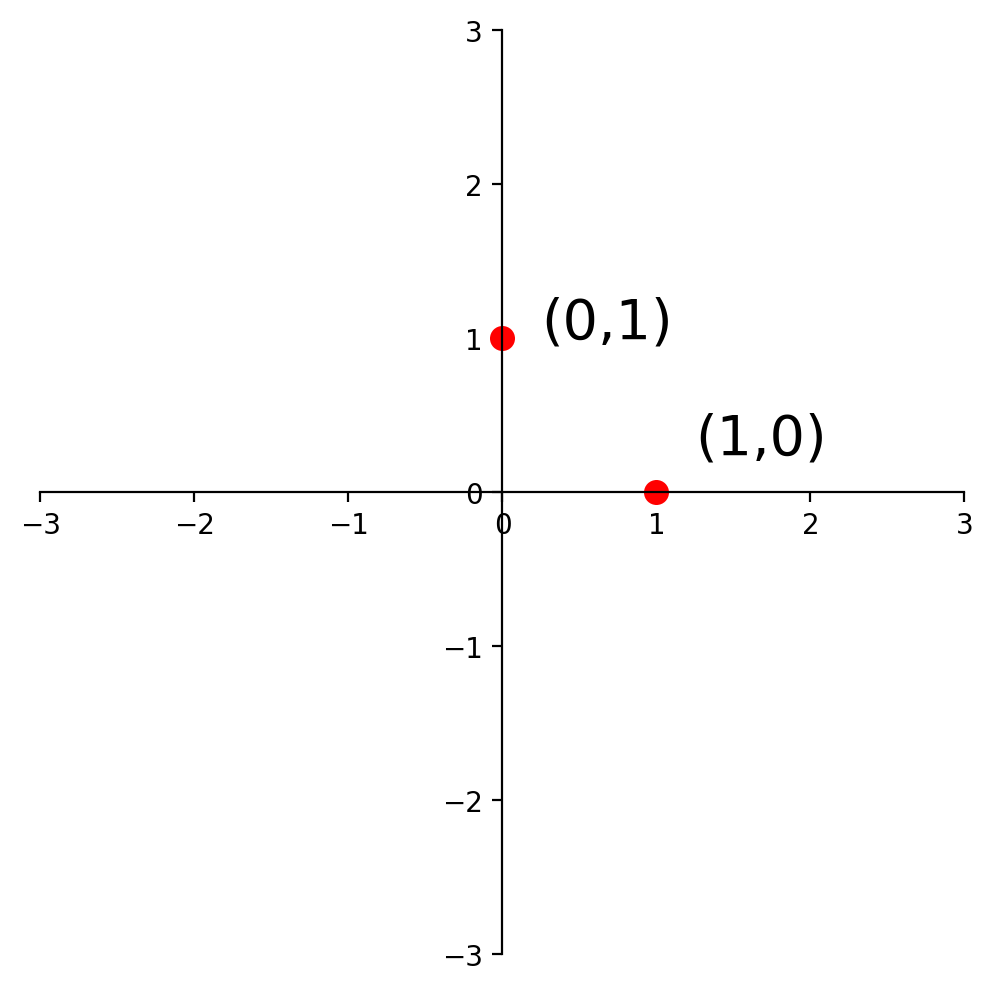

In [13]:
ax = dm.plotSetup()
ax.plot([0],[1],'ro',markersize=8)
ax.text(0.25,1,'(0,1)',size=20)
ax.plot([1],[0],'ro',markersize=8)
ax.text(1.25,0.25,'(1,0)',size=20);

<IPython.core.display.Latex object>

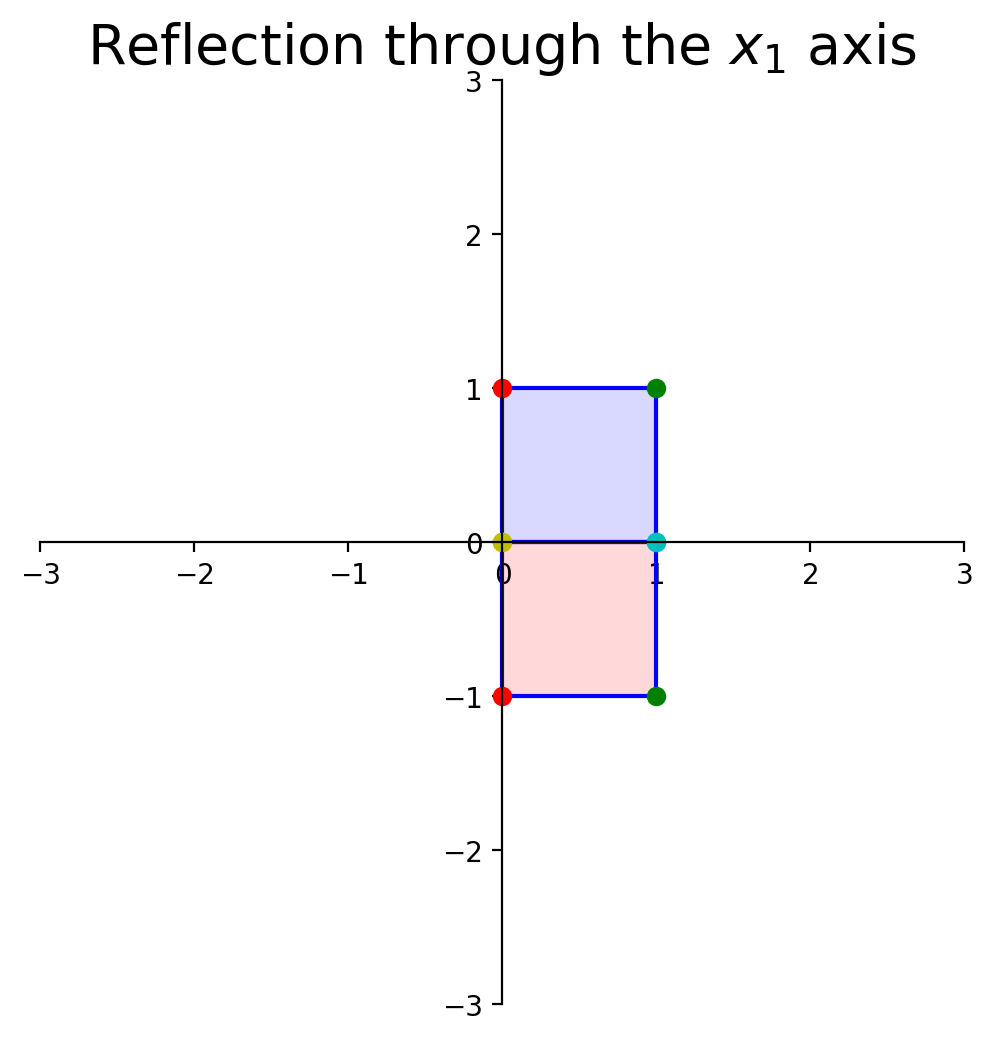

In [14]:
A = np.array(
    [[1,  0],
     [0, -1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.title(r'Reflection through the $x_1$ axis', size = 20);

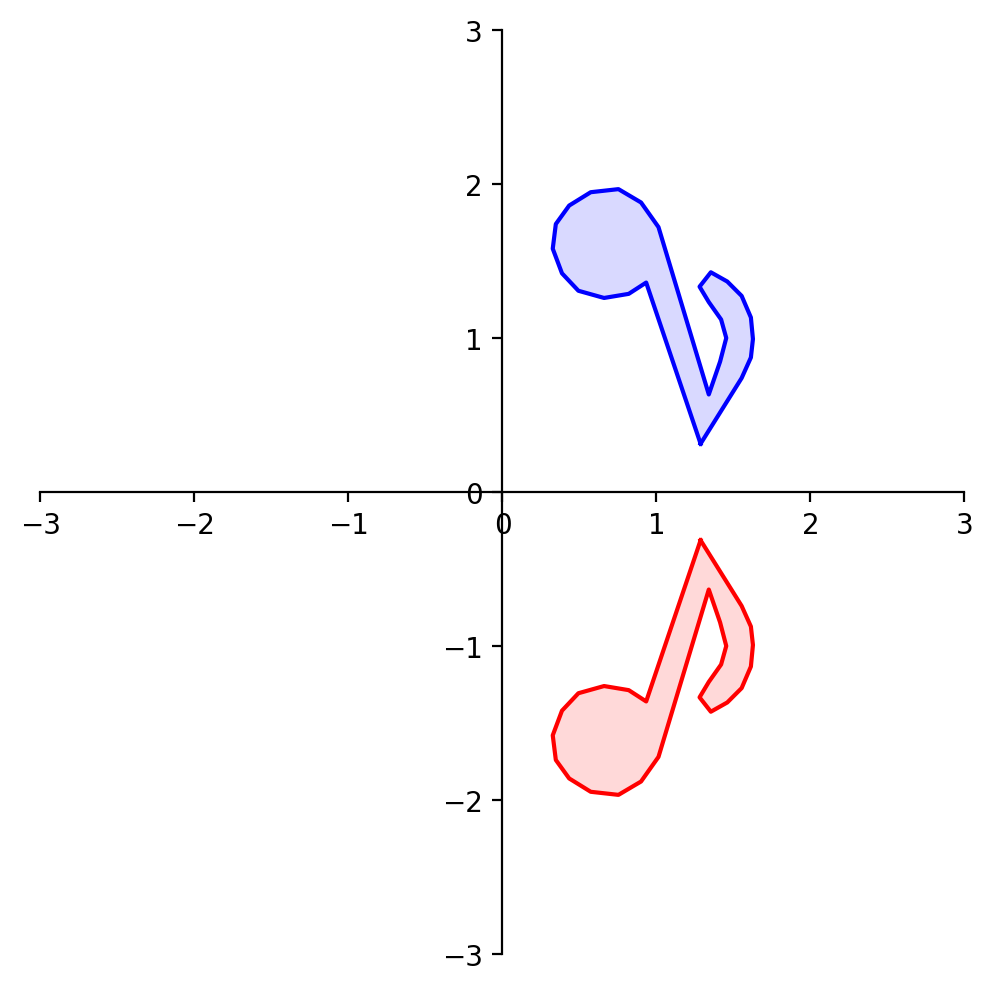

In [15]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the $x_2$ axis?

<IPython.core.display.Latex object>

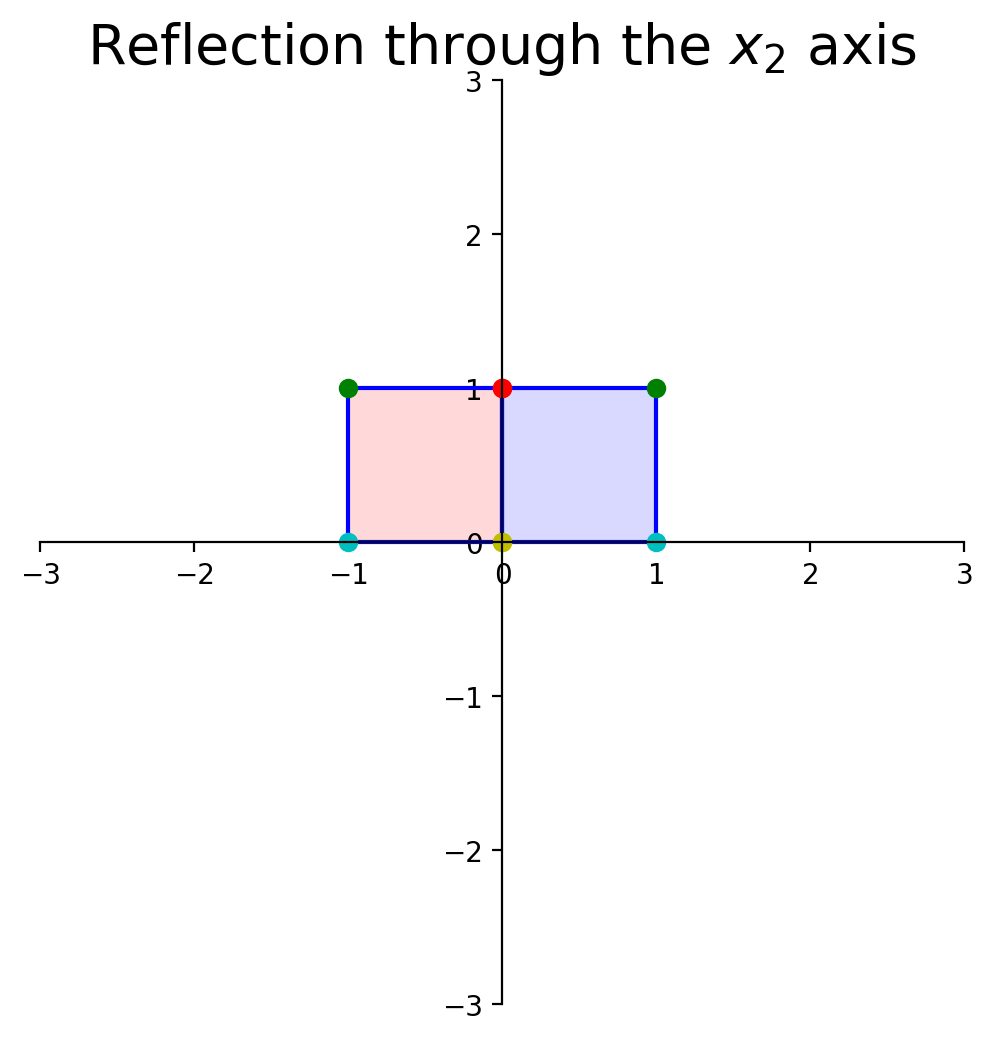

In [16]:
A = np.array(
    [[-1,0],
     [0, 1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:2d}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.title(r'Reflection through the $x_2$ axis', size = 20);

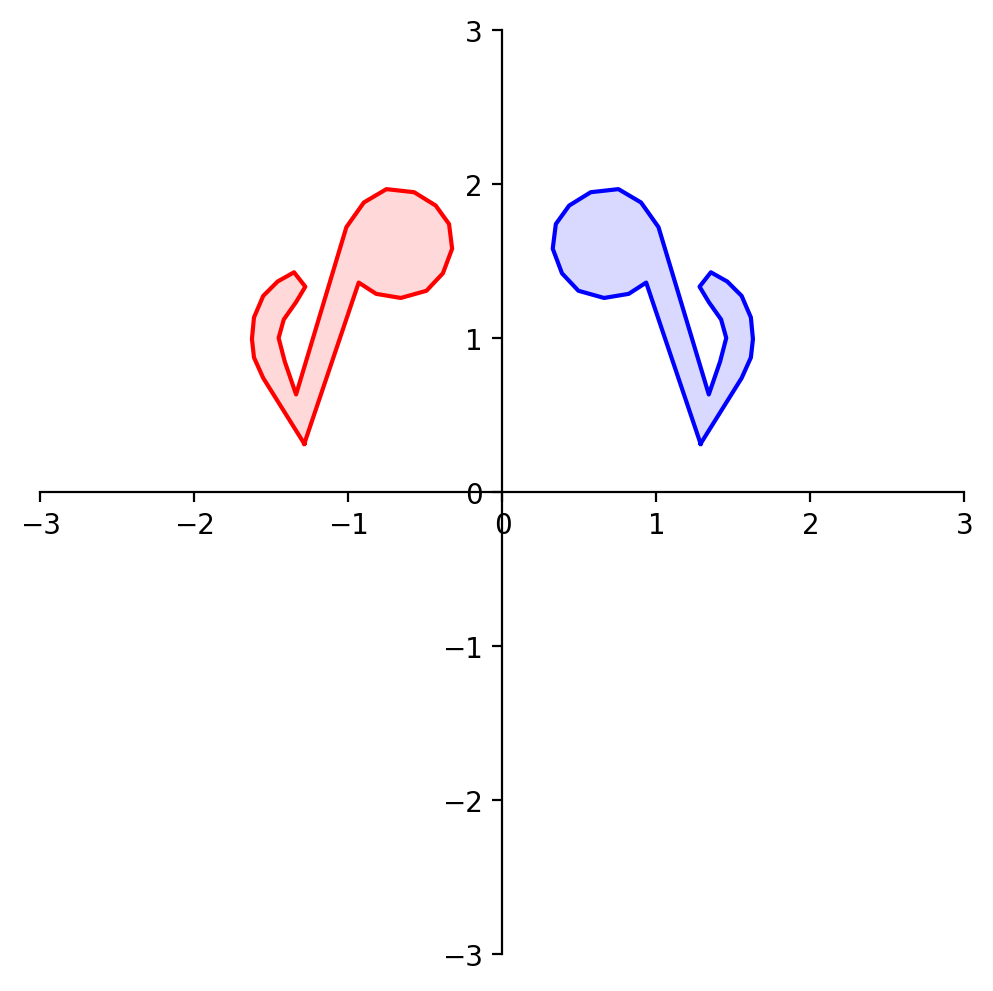

In [17]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the line $x_1 = x_2$?

<IPython.core.display.Latex object>

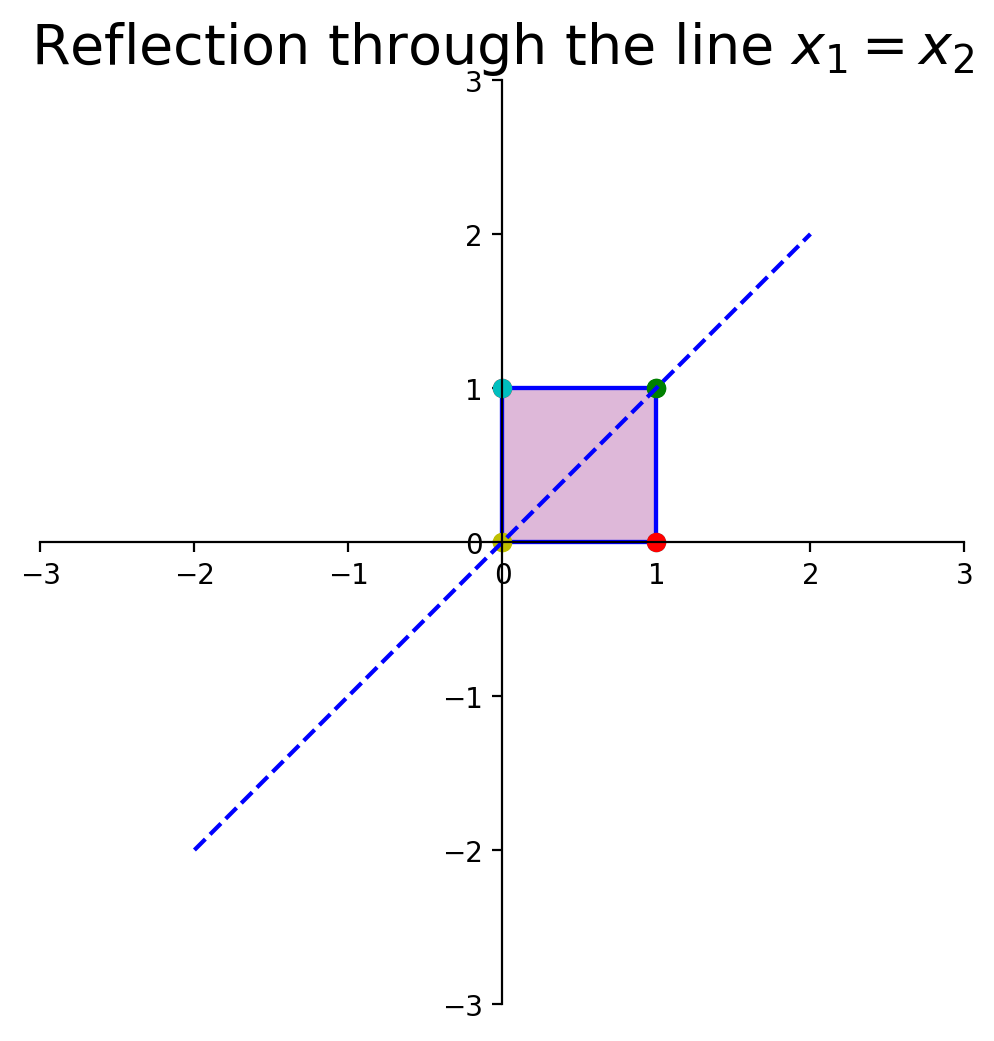

In [18]:
A = np.array(
    [[0,1],
     [1,0]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.plot([-2,2],[-2,2],'b--')
plt.title(r'Reflection through the line $x_1 = x_2$', size = 20);

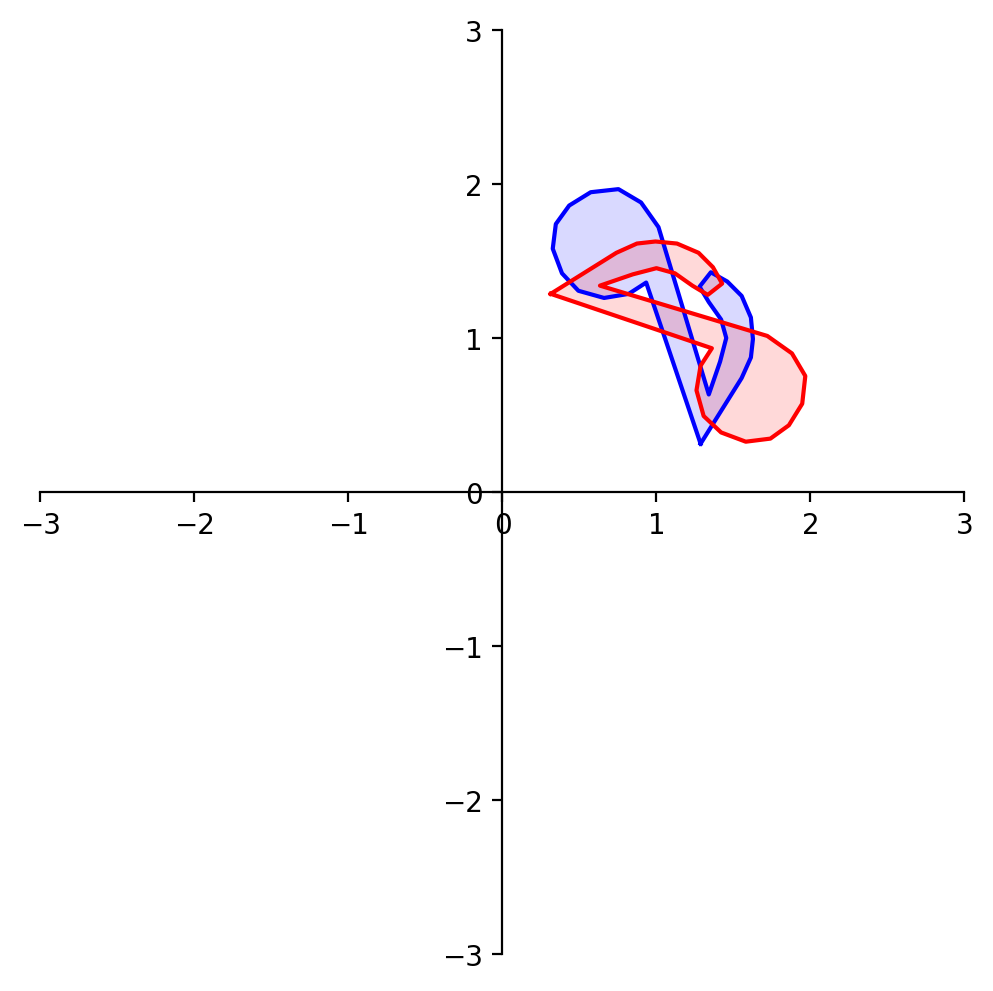

In [19]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the line $x_1 = -x_2$?

<IPython.core.display.Latex object>

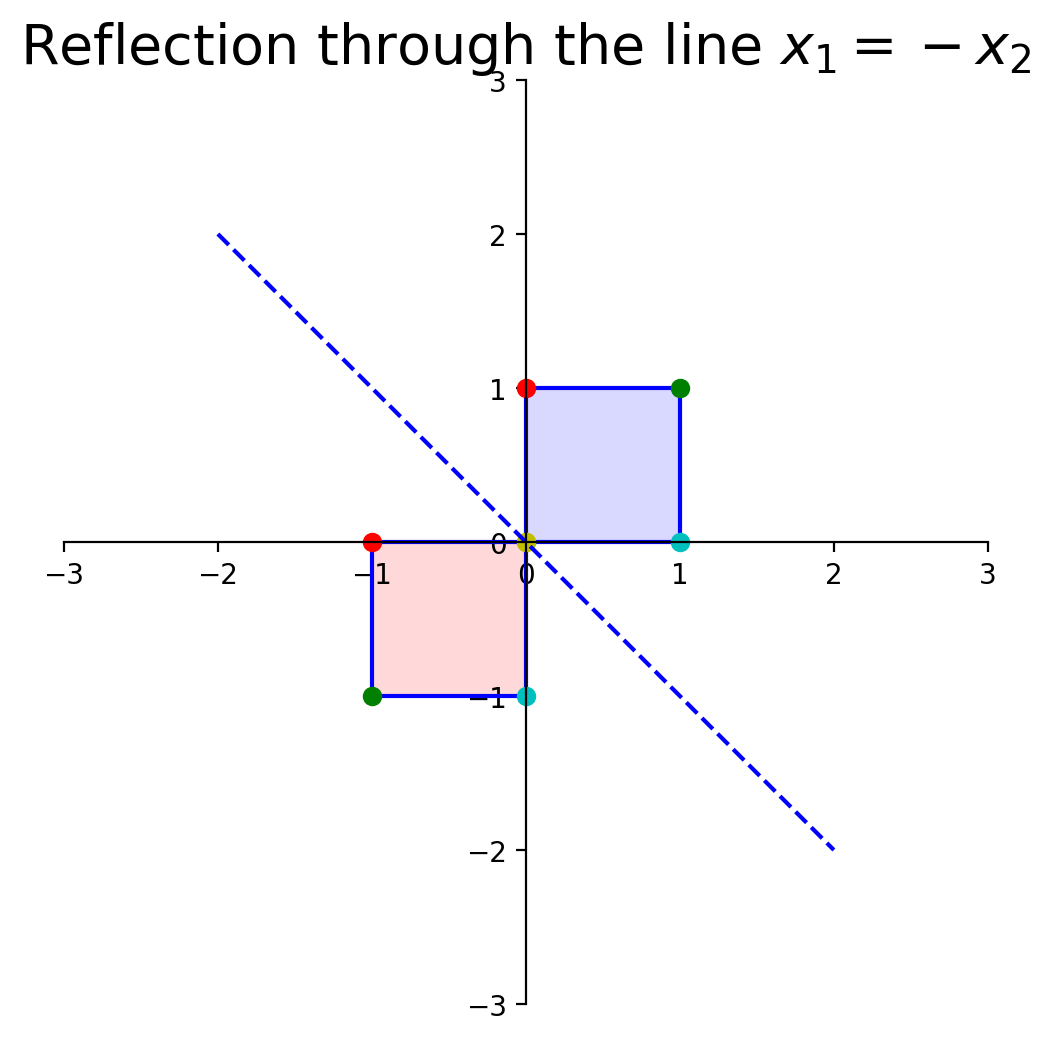

In [20]:
A = np.array(
    [[ 0,-1],
     [-1, 0]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.plot([-2,2],[2,-2],'b--')
plt.title(r'Reflection through the line $x_1 = -x_2$', size = 20);

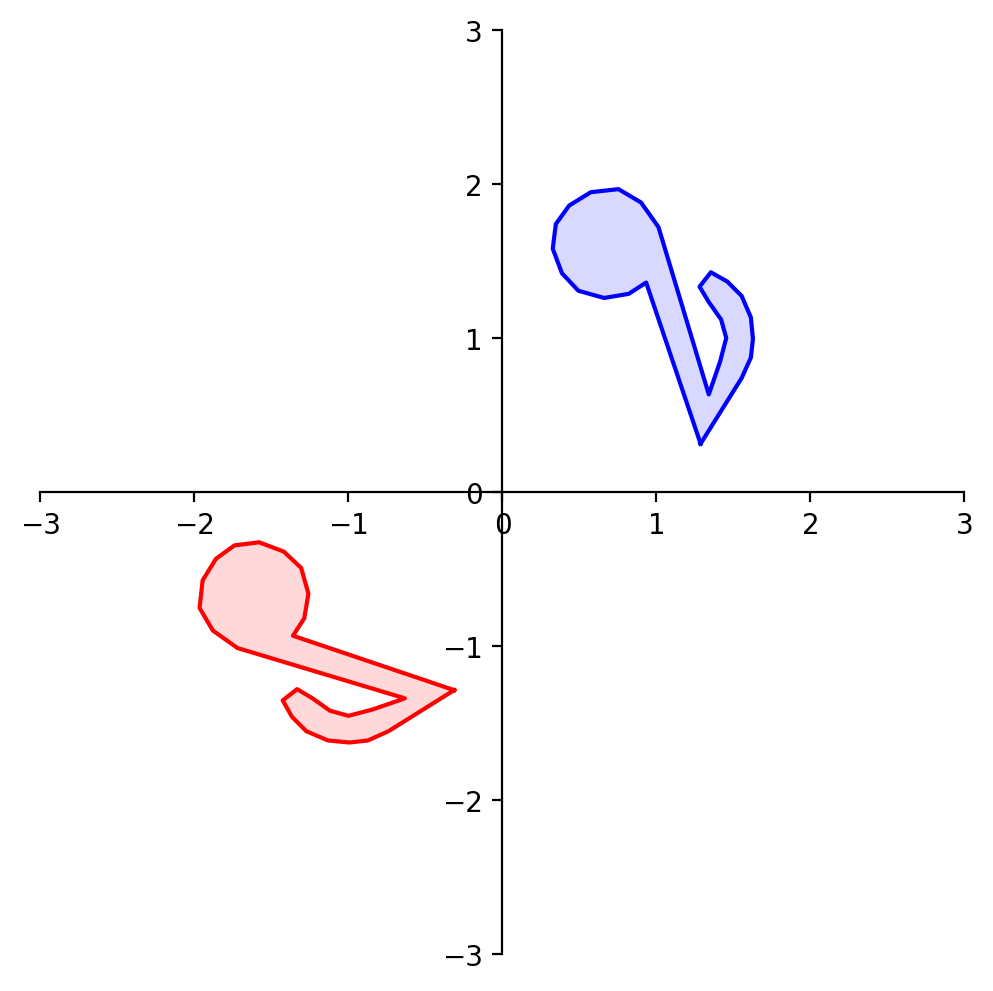

In [21]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

What about reflection through the origin?

<IPython.core.display.Latex object>

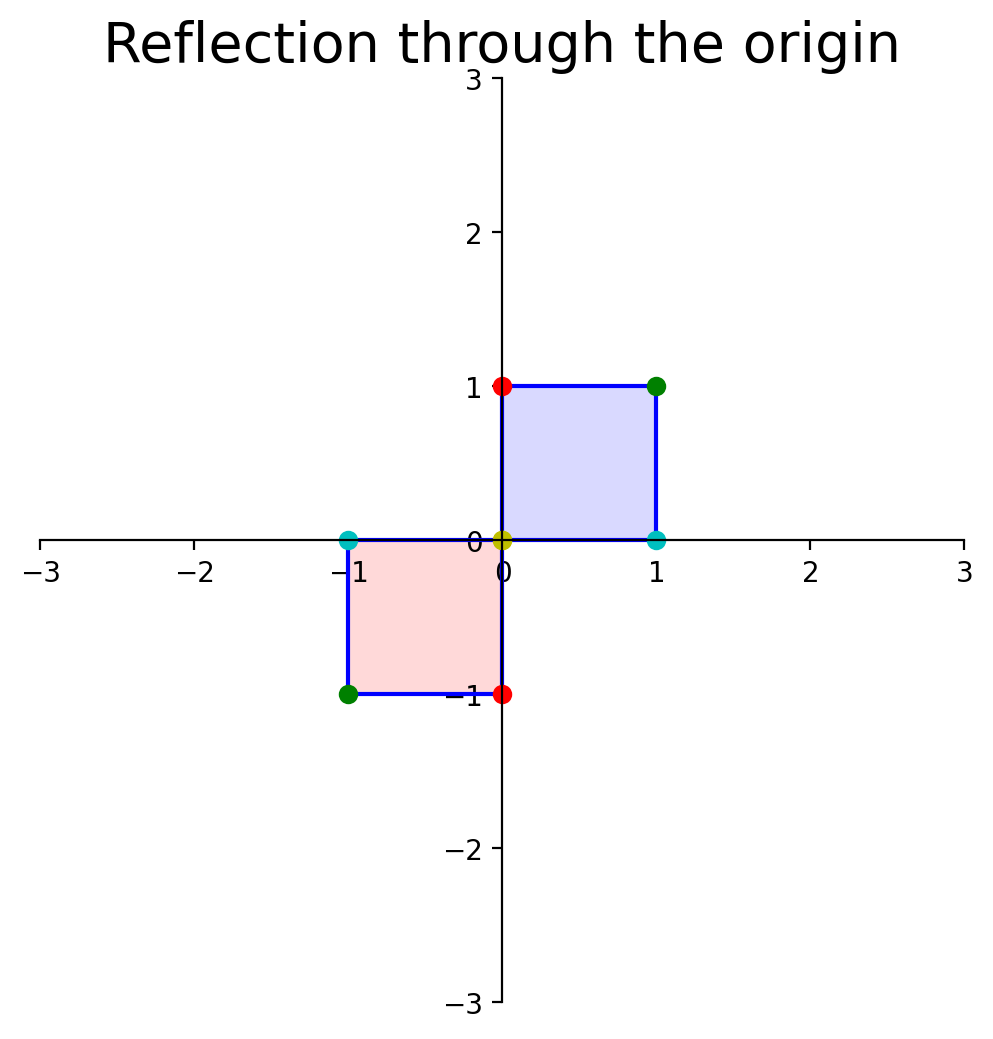

In [22]:
A = np.array(
    [[-1, 0],
     [ 0,-1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.title(r'Reflection through the origin', size = 20);

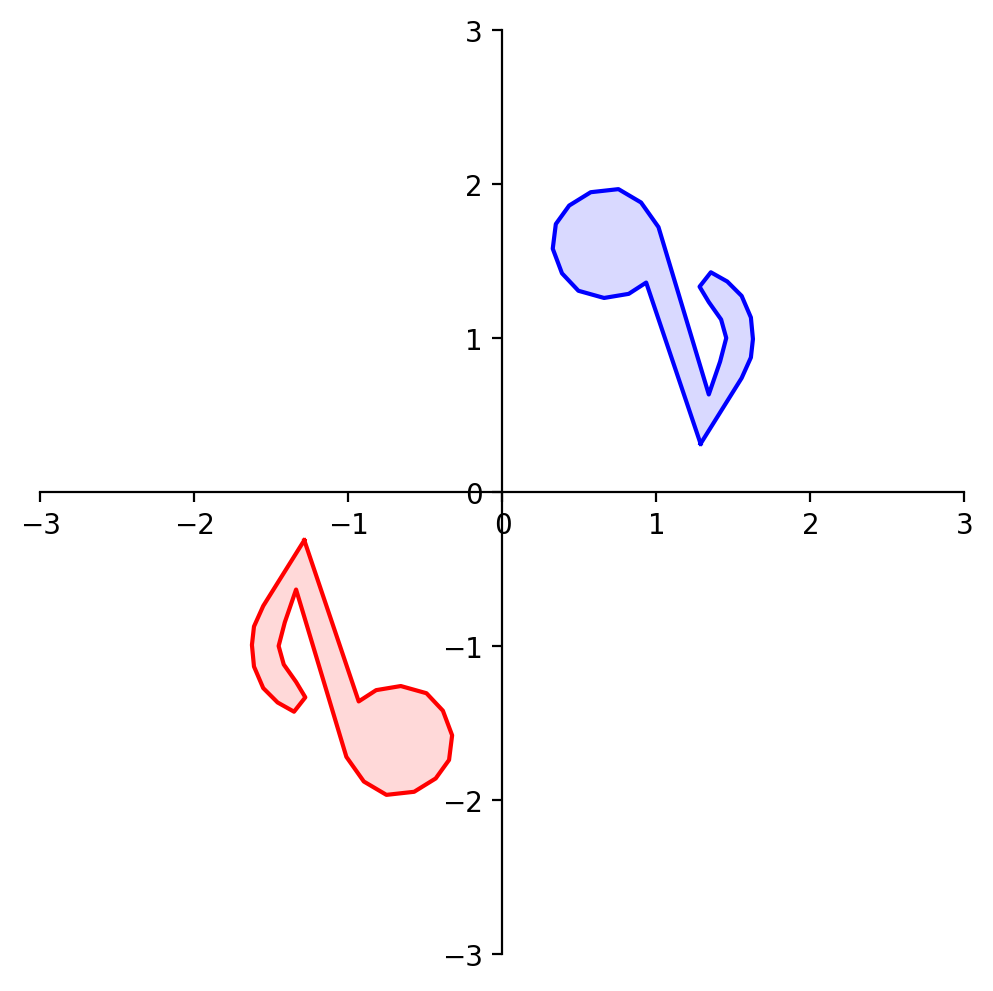

In [23]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

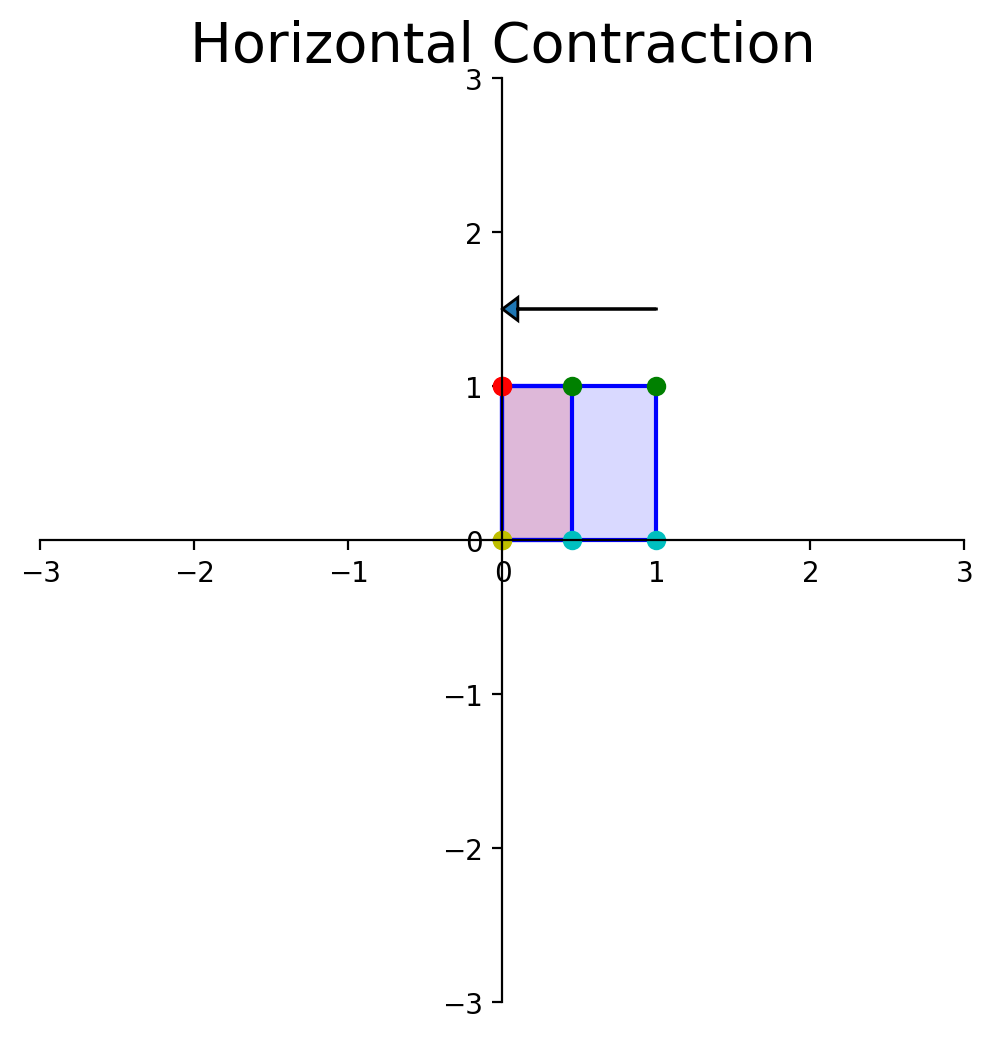

In [24]:
A = np.array(
    [[0.45, 0],
     [0,    1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:0.2f}')}$"))
ax = dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
ax.arrow(1.0,1.5,-1.0,0,head_width=0.15, head_length=0.1, length_includes_head=True)
plt.title(r'Horizontal Contraction', size = 20);

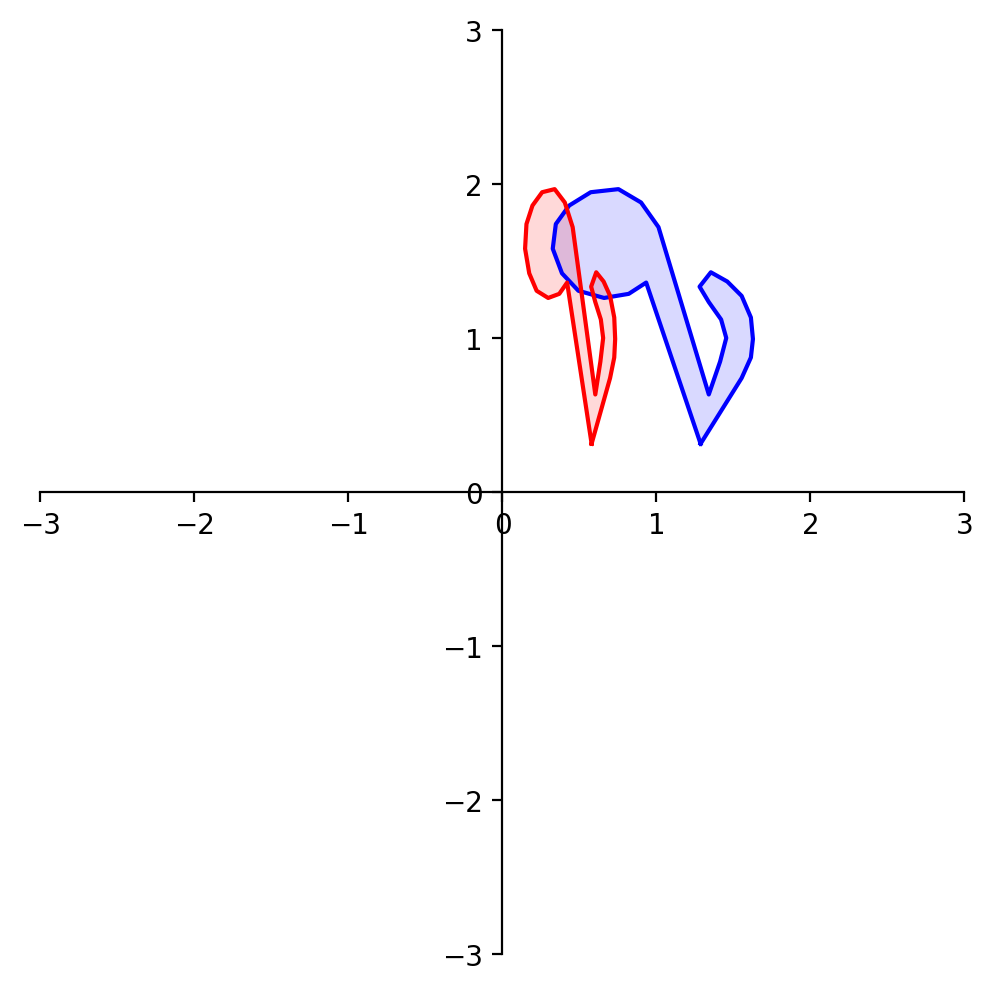

In [25]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

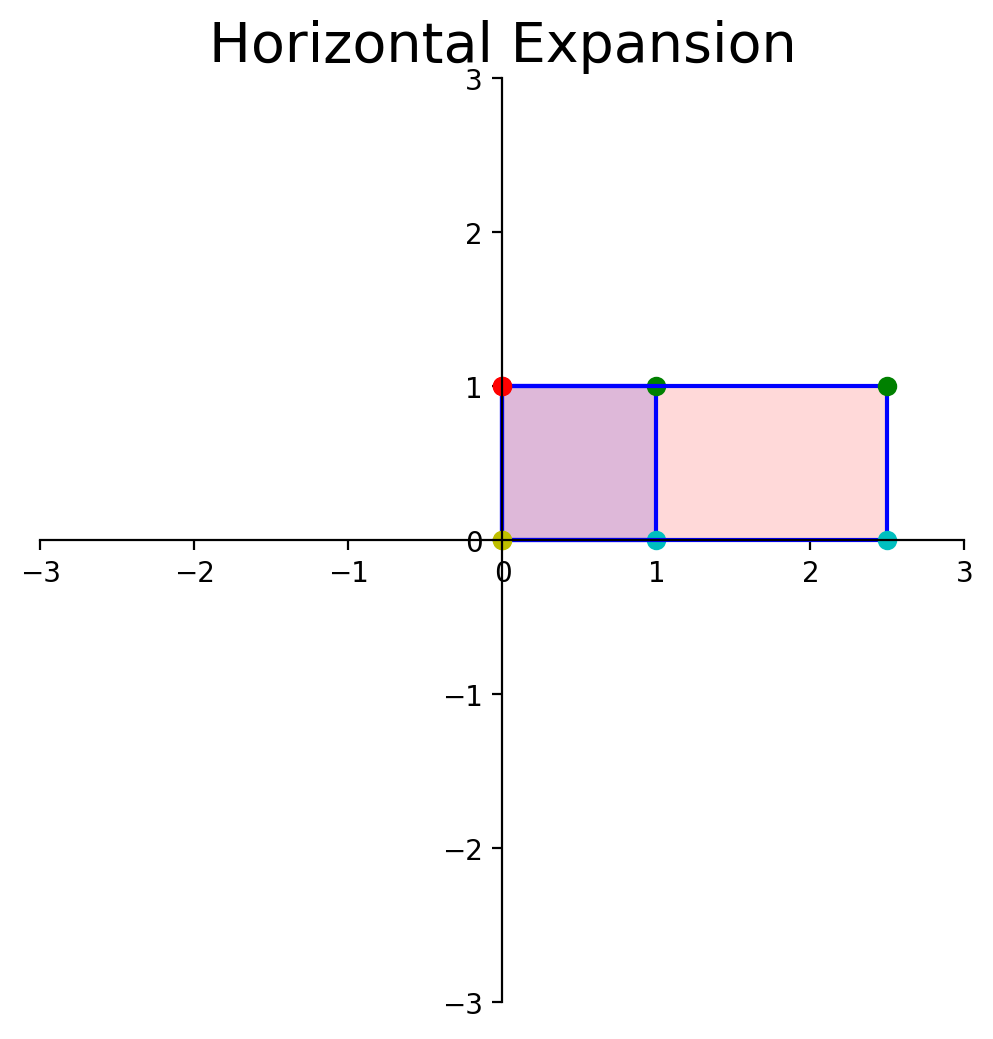

In [26]:
A = np.array(
    [[2.5,0],
     [0,  1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:0.1f}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.title(r'Horizontal Expansion', size = 20);

<IPython.core.display.Latex object>

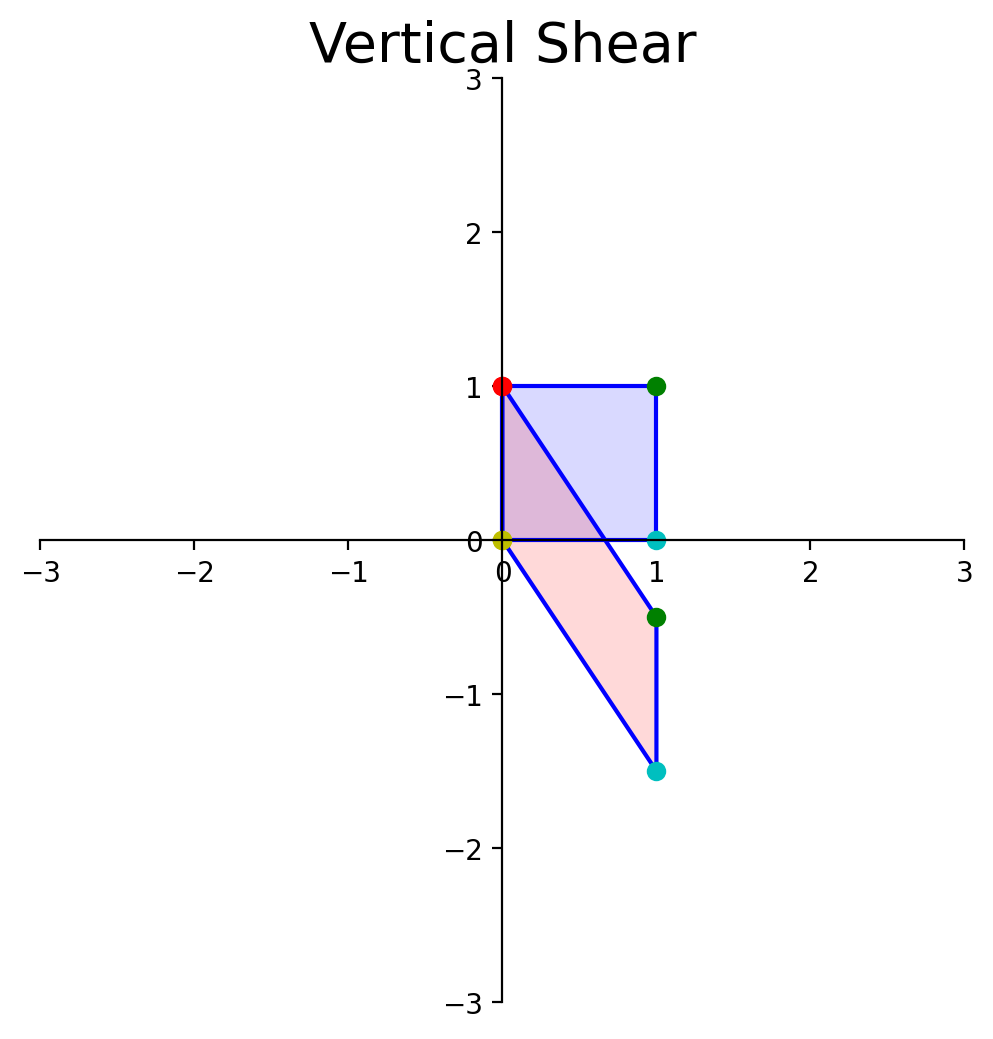

In [27]:
A = np.array(
    [[   1, 0],
     [-1.5, 1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:0.1f}')}$"))
dm.plotSetup()
dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
plt.title(r'Vertical Shear', size = 20);

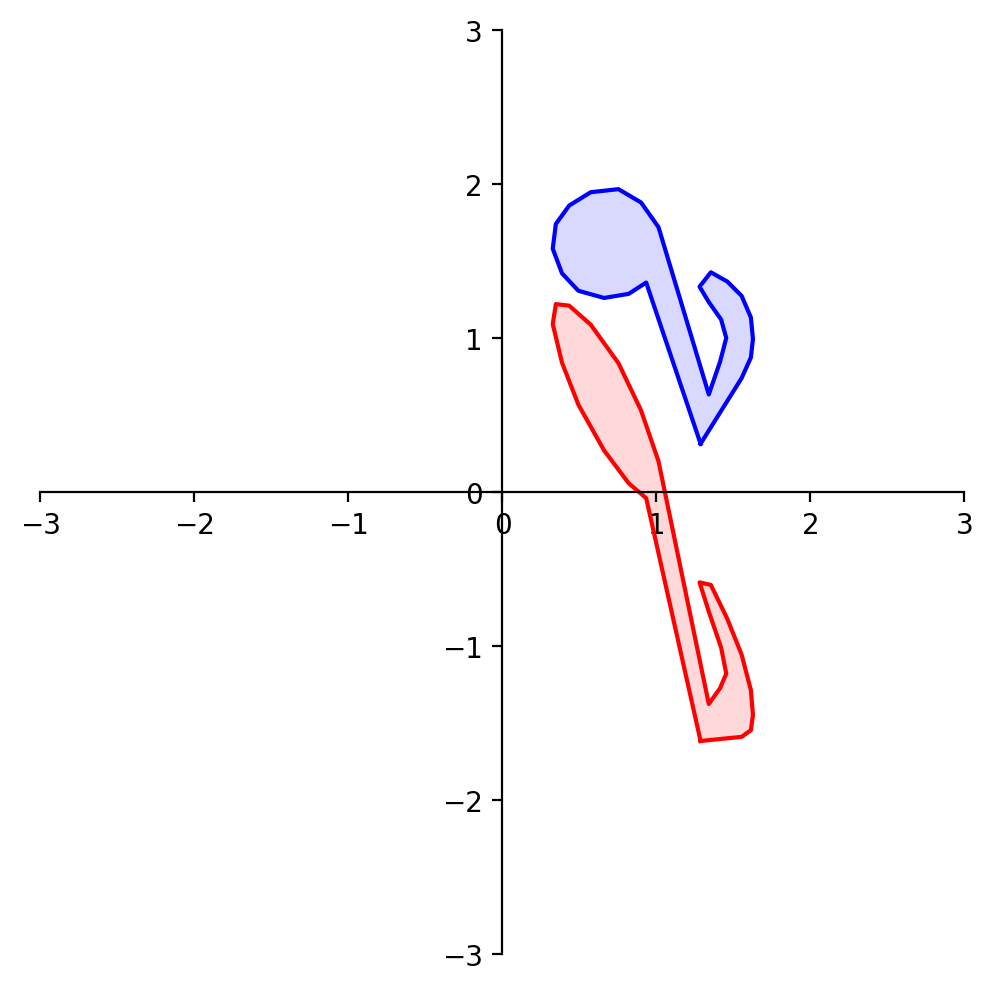

In [28]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

``` {toggle}
Question 8.2
```

Now let's look at a particular kind of transformation called a __projection__.

Imagine we took any given point and 'dropped' it onto the $x_1$-axis.

<IPython.core.display.Latex object>

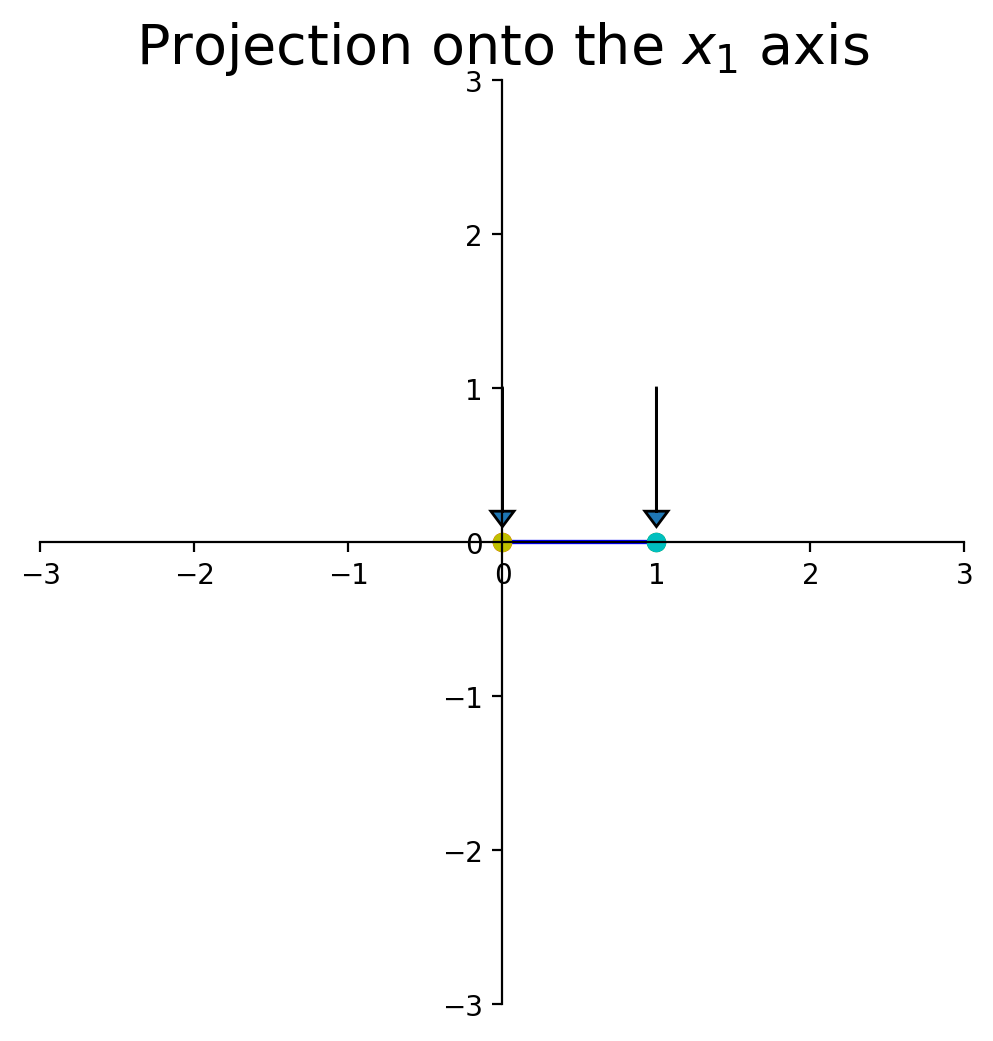

In [29]:
A = np.array(
    [[1,0],
     [0,0]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
ax.arrow(1.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(0.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
plt.title(r'Projection onto the $x_1$ axis', size  = 20);

What happens to the __shape__ of the point set?

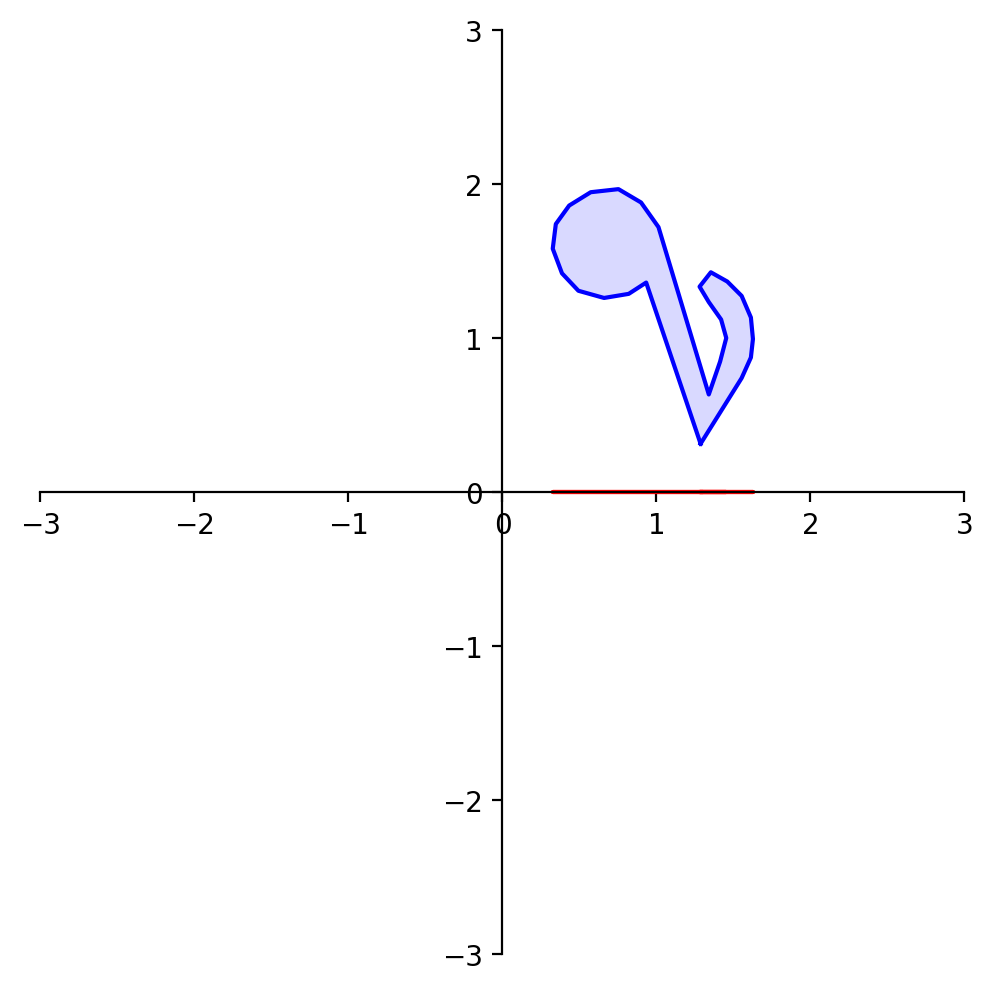

In [30]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

<IPython.core.display.Latex object>

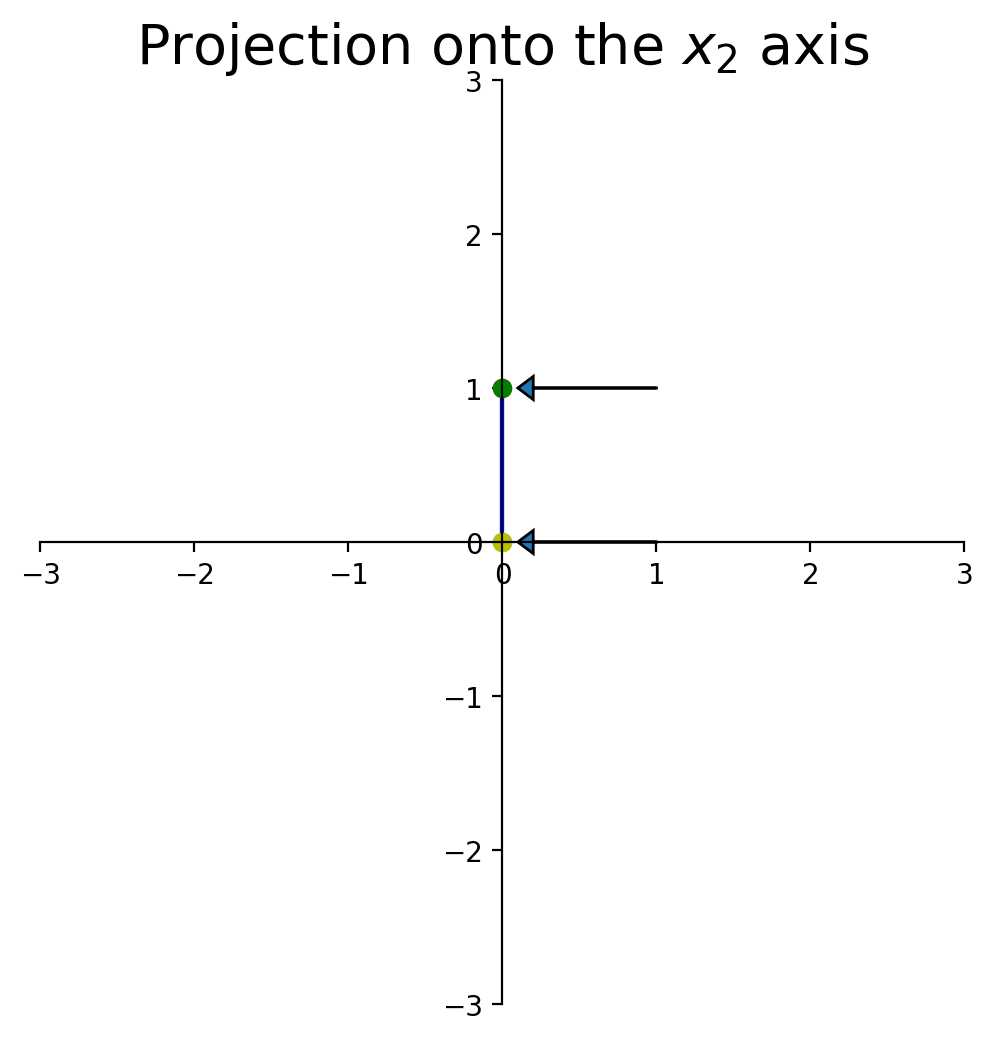

In [31]:
A = np.array(
    [[0,0],
     [0,1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:d}')}$"))
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A @ square)
ax.arrow(1.0,1.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(1.0,0.0,-0.9,0,head_width=0.15, head_length=0.1, length_includes_head=True)
plt.title(r'Projection onto the $x_2$ axis', size = 20);

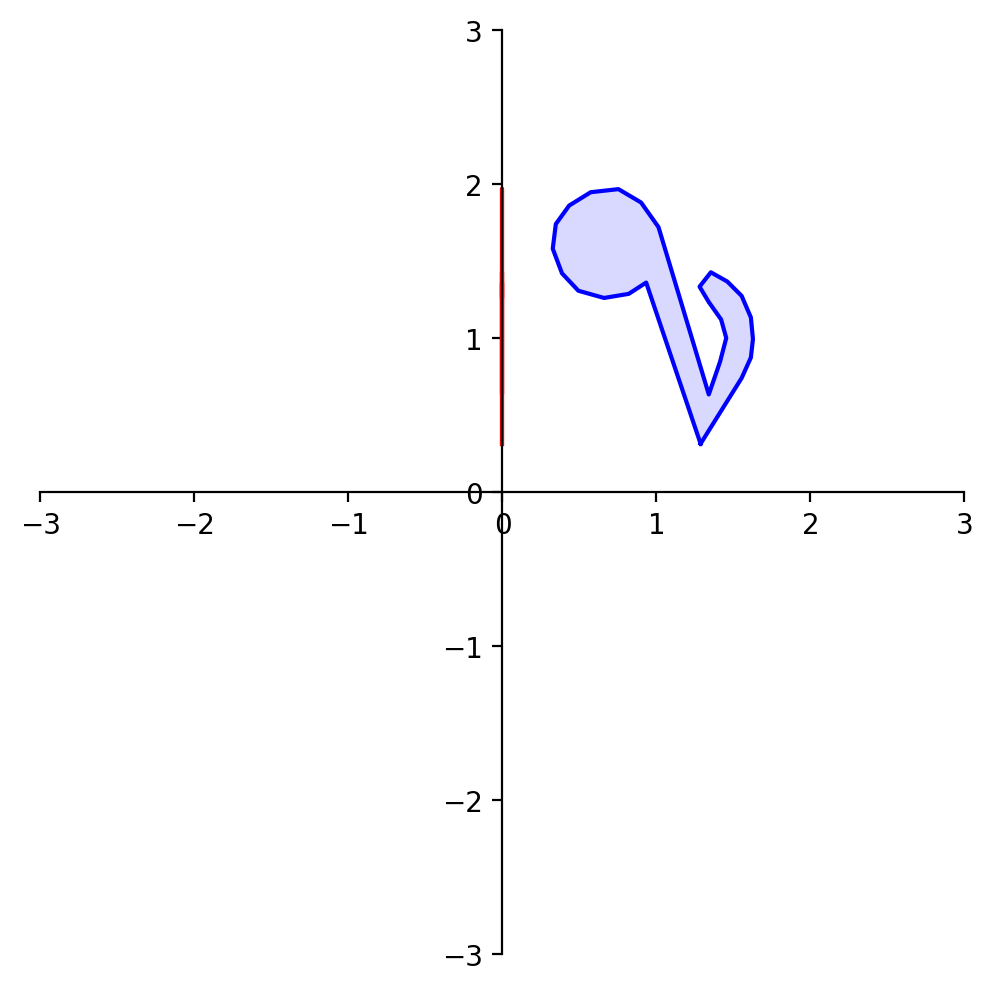

In [32]:
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

## Area is Scaled by the Determinant

Notice that in some of the transformations above, the "size" of a shape grows or shrinks.

Let's look at how area (or volume) of a shape is affected by a linear transformation.

<IPython.core.display.Latex object>

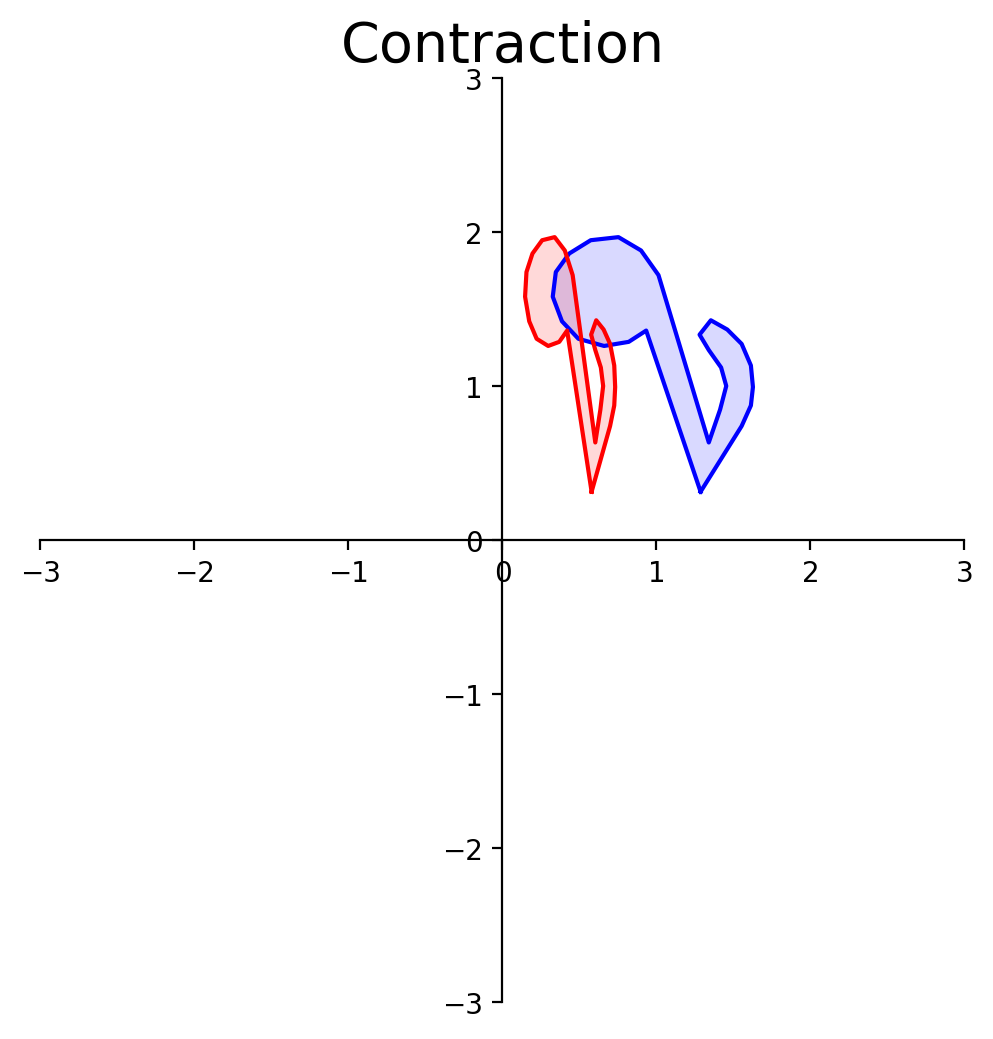

In [33]:
A = np.array(
    [[0.45, 0],
     [0,    1]])
display(Latex(rf"$A = {ltx_array_fmt(A, '{:0.2f}')}$"))
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')
plt.title('Contraction', size = 20);

In this transformation, each unit of area in the blue shape is transformed to a smaller region in the red shape.

So to understand how area changes, it suffices to ask what happens to the unit square (or hypercube):

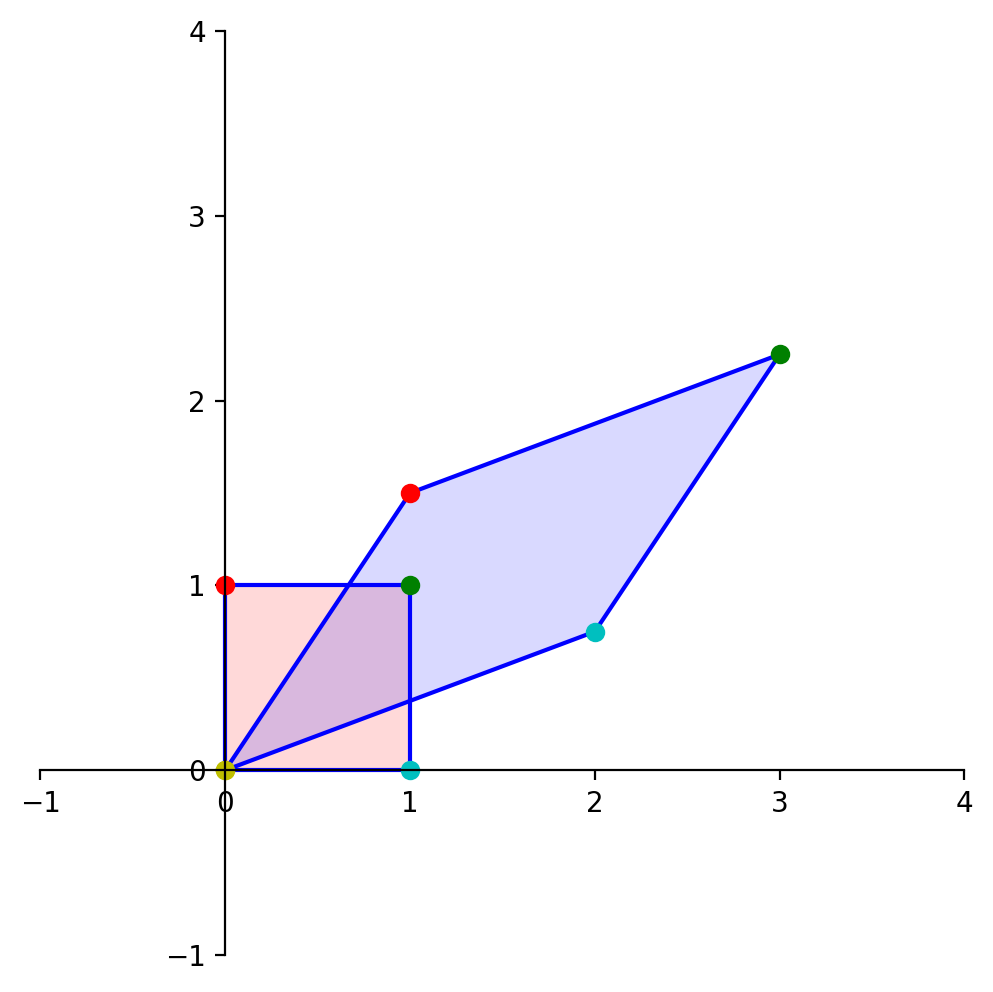

In [34]:
A = np.array([[2, 1],[0.75, 1.5]])
ax = dm.plotSetup(-1, 4, -1, 4)
dm.plotSquare(square, 'r')
dm.plotSquare(A @ square);

Let's denote the matrix of our linear transformation as:

$$ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} $$

Then, here is what happens to the unit square:

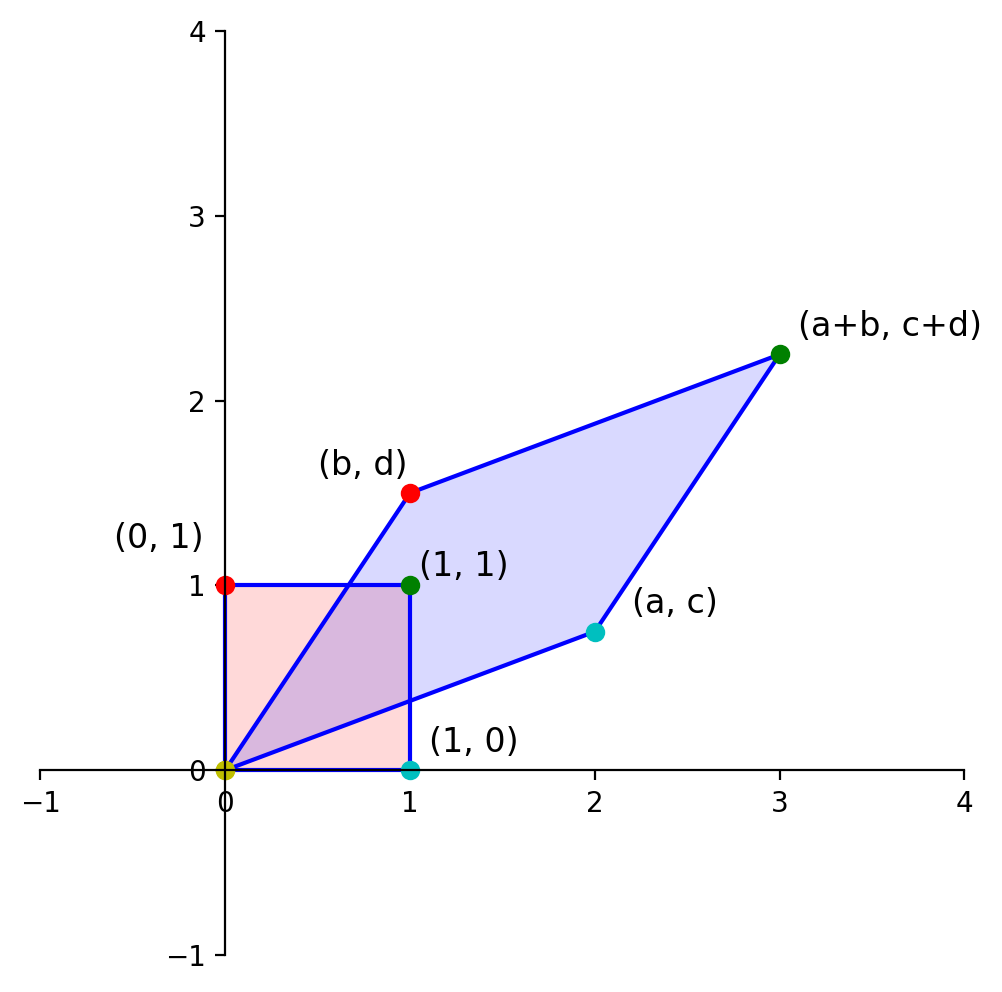

In [35]:
v1 = np.array([2, 0.75])
v2 = np.array([1, 1.5])
A = np.column_stack([v1, v2])
ax = dm.plotSetup(-1, 4, -1, 4)
dm.plotSquare(square, 'r')
dm.plotSquare(A @ square)
plt.text(1.1, 0.1, '(1, 0)', size = 12)
plt.text(1.05, 1.05, '(1, 1)', size = 12)
plt.text(-0.6, 1.2, '(0, 1)', size = 12)
plt.text(v1[0]+0.2, v1[1]+0.1, '(a, c)', size = 12)
plt.text((v1+v2)[0]+0.1, (v1+v2)[1]+0.1, '(a+b, c+d)', size = 12)
plt.text(v2[0]-0.5, v2[1]+0.1, '(b, d)', size = 12);

Now, let's determine the area of the blue diamond in terms of $a, b, c$, and $d$.

To do that, we'll use this diagram:

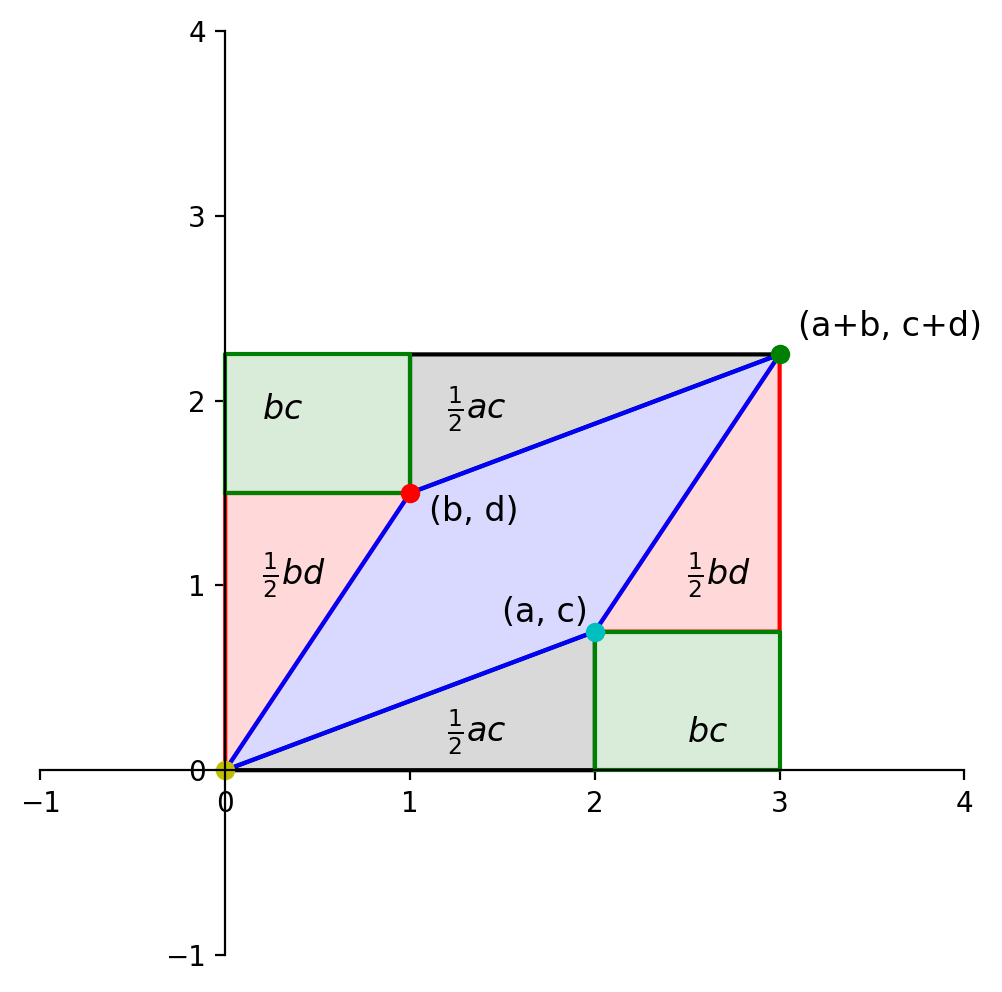

In [36]:
a = 2
b = 1
c = 0.75
d = 1.5
v1 = np.array([a, c])
v2 = np.array([b, d])
A = np.column_stack([v1, v2])
ax = dm.plotSetup(-1, 4, -1, 4)
# red triangles
dm.plotShape(np.array([[0, 0], [0, d], [b, d]]).T, 'r')
plt.text(0.2, 1, r'$\frac{1}{2}bd$', size = 12)
dm.plotShape(np.array([[a, c], [a+b, c+d], [a+b, c]]).T, 'r')
plt.text(2.5, 1, r'$\frac{1}{2}bd$', size = 12)
# gray triangles
dm.plotShape(np.array([[b, d], [b, c+d], [a+b, c+d]]).T, 'k')
plt.text(1.2, 1.9, r'$\frac{1}{2}ac$', size = 12)
dm.plotShape(np.array([[0, 0], [a, c], [a, 0]]).T, 'k')
plt.text(1.2, 0.15, r'$\frac{1}{2}ac$', size = 12)
# green squares
dm.plotShape(np.array([[a, 0], [a, c], [a+b, c], [a+b, 0]]).T, 'g')
plt.text(0.2, 1.9, r'$bc$', size = 12)
dm.plotShape(np.array([[0, d], [0, c+d], [b, c+d], [b, d]]).T, 'g')
plt.text(2.5, 0.15, r'$bc$', size = 12)
#
dm.plotSquare(A @ square)
plt.text(v1[0]-0.5, v1[1]+0.05, '(a, c)', size = 12)
plt.text((v1+v2)[0]+0.1, (v1+v2)[1]+0.1, '(a+b, c+d)', size = 12)
plt.text(v2[0]+0.1, v2[1]-0.15, '(b, d)', size = 12);

Each of the triangles and rectangles has an area we can determine in terms of $a, b, c$ and $d$.

The large rectangle has sides $(a+b)$ and $(c+d)$, so its area is:

$$ (a+b)(c+d) = ac + ad + bc + bd. $$

From this large rectangle we need to subtract:
* $bd$ (red triangles),
* $ac$ (gray triangles), and
* $2bc$ (green rectangles).

So the area of the blue diamond is:

$$ (ac + ad + bc + bd) - (bd + ac + 2bc) $$

$$ = ad - bc $$

So we conclude that when we use a linear transformation

$$ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} $$

the __area of a unit square__ (or any shape) __is scaled by a factor of $ad - bc$.__

This quantity is a fundamental property of the matrix $A$.

So, we give it a name: it is the __determinant__ of $A$.

We denote it as 

$$\det(A)$$

So, for a $2\times 2$ matrix $ A = \begin{bmatrix} a & b \\ c & d \end{bmatrix} $, 

$$\det(A) = ad-bc.$$

However, the determinant can be defined for __any__ $n\times n$ (square) matrix.

For a square matrix $A$ larger than $2\times 2$, the determinant tells us how the __volume__ of a unit (hyper)cube is scaled when it is linearly transformed by $A$.

We will learn how to compute determinants for larger matrices in a later lecture.

There are important cases in which the determinant of a matrix is __zero.__

When does it happen that $\det(A) = 0$?

Consider when $A$ is the matrix of a projection:

<IPython.core.display.Latex object>

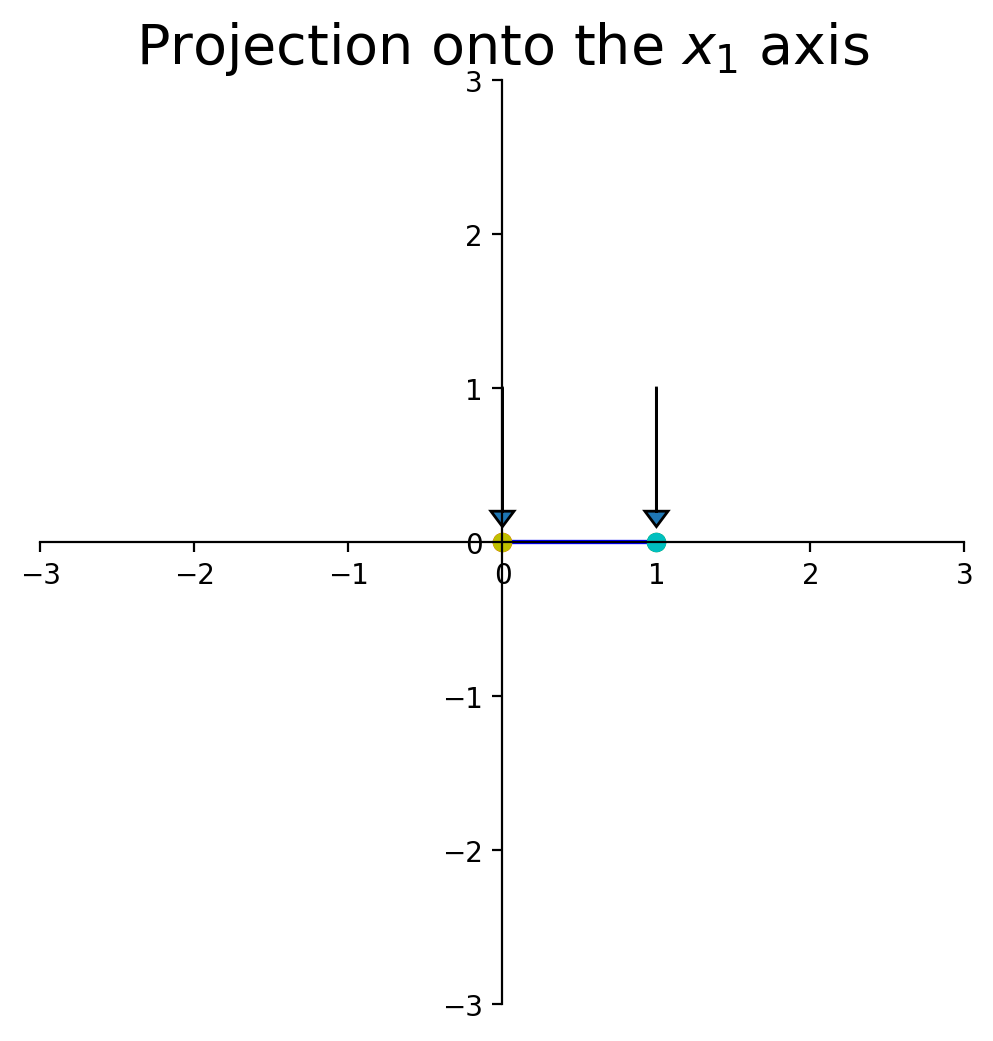

In [37]:
A = np.array(
    [[1,0],
     [0,0]])
display(Latex(rf'$A = {int_fmt(A)}$'))
ax = dm.plotSetup()
# dm.plotSquare(square)
dm.plotSquare(A @ square,'r')
ax.arrow(1.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
ax.arrow(0.0,1.0,0,-0.9,head_width=0.15, head_length=0.1, length_includes_head=True)
plt.title(r'Projection onto the $x_1$ axis', size = 20);

The unit square has been collapsed onto the $x$-axis, resulting in a shape with area of zero.

This is confirmed by the determinant, which is 

$$ \det\left(\begin{bmatrix}1 & 0 \\ 0 & 0\end{bmatrix}\right) = (1 \cdot 0) - (0 \cdot 0) = 0.$$

## Existence and Uniqueness

Notice that some of these transformations map multiple inputs to the same output, and some are incapable of generating certain outputs.

For example, the __projections__ above can send multiple different points to the same point.

We need some terminology to understand these properties of linear transformations.

__Definition.__ A mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is said to be __onto__ $\mathbb{R}^m$ if each $\mathbf{b}$ in $\mathbb{R}^m$ is the image of _at least one_ $\mathbf{x}$ in $\mathbb{R}^n$.

Informally, $T$ is onto if every element of its codomain is in its range.

Another (important) way of thinking about this is that $T$ is onto if there is a solution $\mathbf{x}$ of

$$T(\mathbf{x}) = \mathbf{b}$$

for all possible $\mathbf{b}.$

This is asking an __existence__ question about a solution of the equation $T(\mathbf{x}) = \mathbf{b}$ for all $\mathbf{b}.$

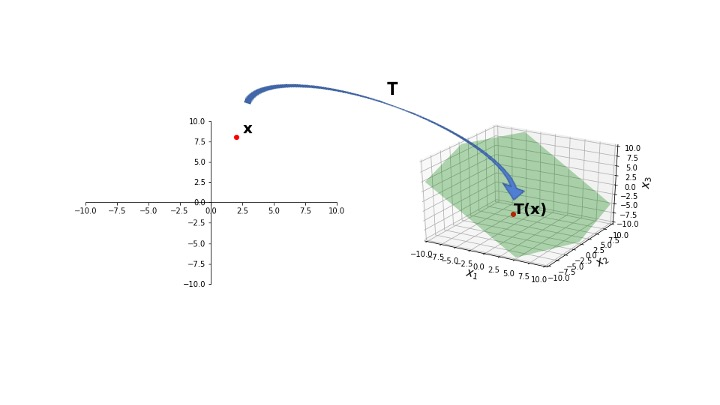

In [38]:
display(Image("images/L7 F4.jpg", width=650))

Here, we see that $T$ maps points in $\mathbb{R}^2$ to a plane lying __within__ $\mathbb{R}^3$.  

That is, the range of $T$ is a strict subset of the codomain of $T$.

So $T$ is __not onto__ $\mathbb{R}^3$.

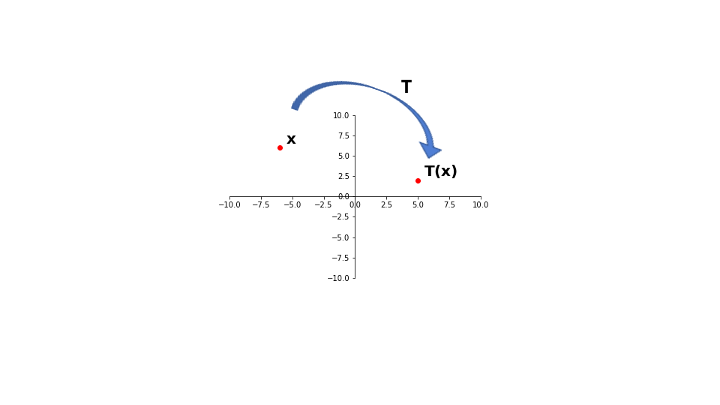

In [39]:
display(Image("images/L8 F3.png", width=650))

In this case, for every point in $\mathbb{R}^2$, there is an $\mathbf{x}$ that maps to that point.

So, the range of $T$ is equal to the codomain of $T$.

So $T$ is __onto__ $\mathbb{R}^2$.

Here is an example of the reflection transformation.  The red points are the images of the blue points.

What about this transformation?   Is it onto $\mathbb{R}^2$?

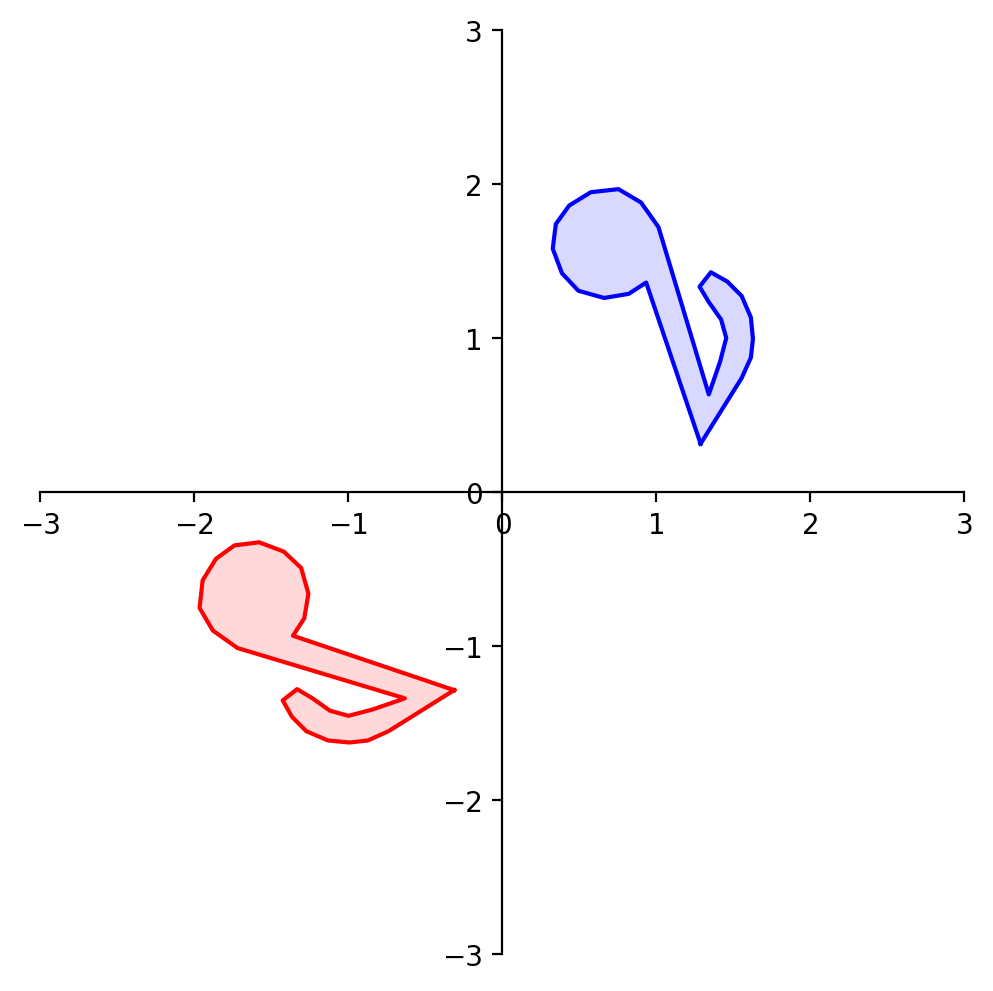

In [40]:
A = np.array(
    [[ 0,-1],
     [-1, 0]])
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

Here is an example of the projection transformation.  The red points (which all lie on the $x$-axis) are the images of the blue points.

What about this transformation?  Is it onto $\mathbb{R}^2$?

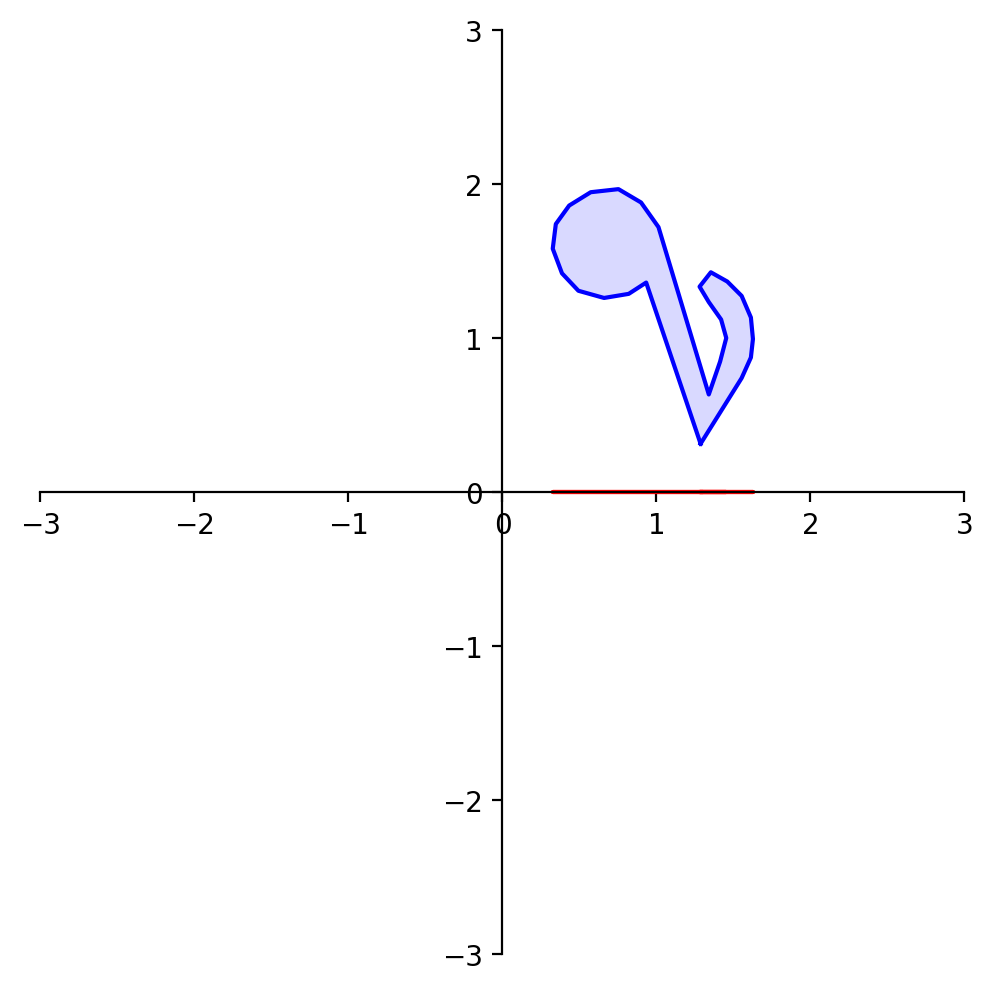

In [41]:
A = np.array(
    [[1,0],
     [0,0]])
dm.plotSetup()
dm.plotShape(note)
dm.plotShape(A @ note,'r')

``` {toggle}
Question Time! Q8.3
```

__Definition.__  A mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is said to be __one-to-one__ if each $\mathbf{b}$ in $\mathbb{R}^m$ is the image of _at most one_ $\mathbf{x}$ in $\mathbb{R}^n$.

If $T$ is one-to-one, then for each $\mathbf{b},$ the equation $T(\mathbf{x}) = \mathbf{b}$ has either a unique solution, or none at all.

This is asking a __uniqueness__ question about a solution of the equation $T(\mathbf{x}) = \mathbf{b}$ for all $\mathbf{b}$.

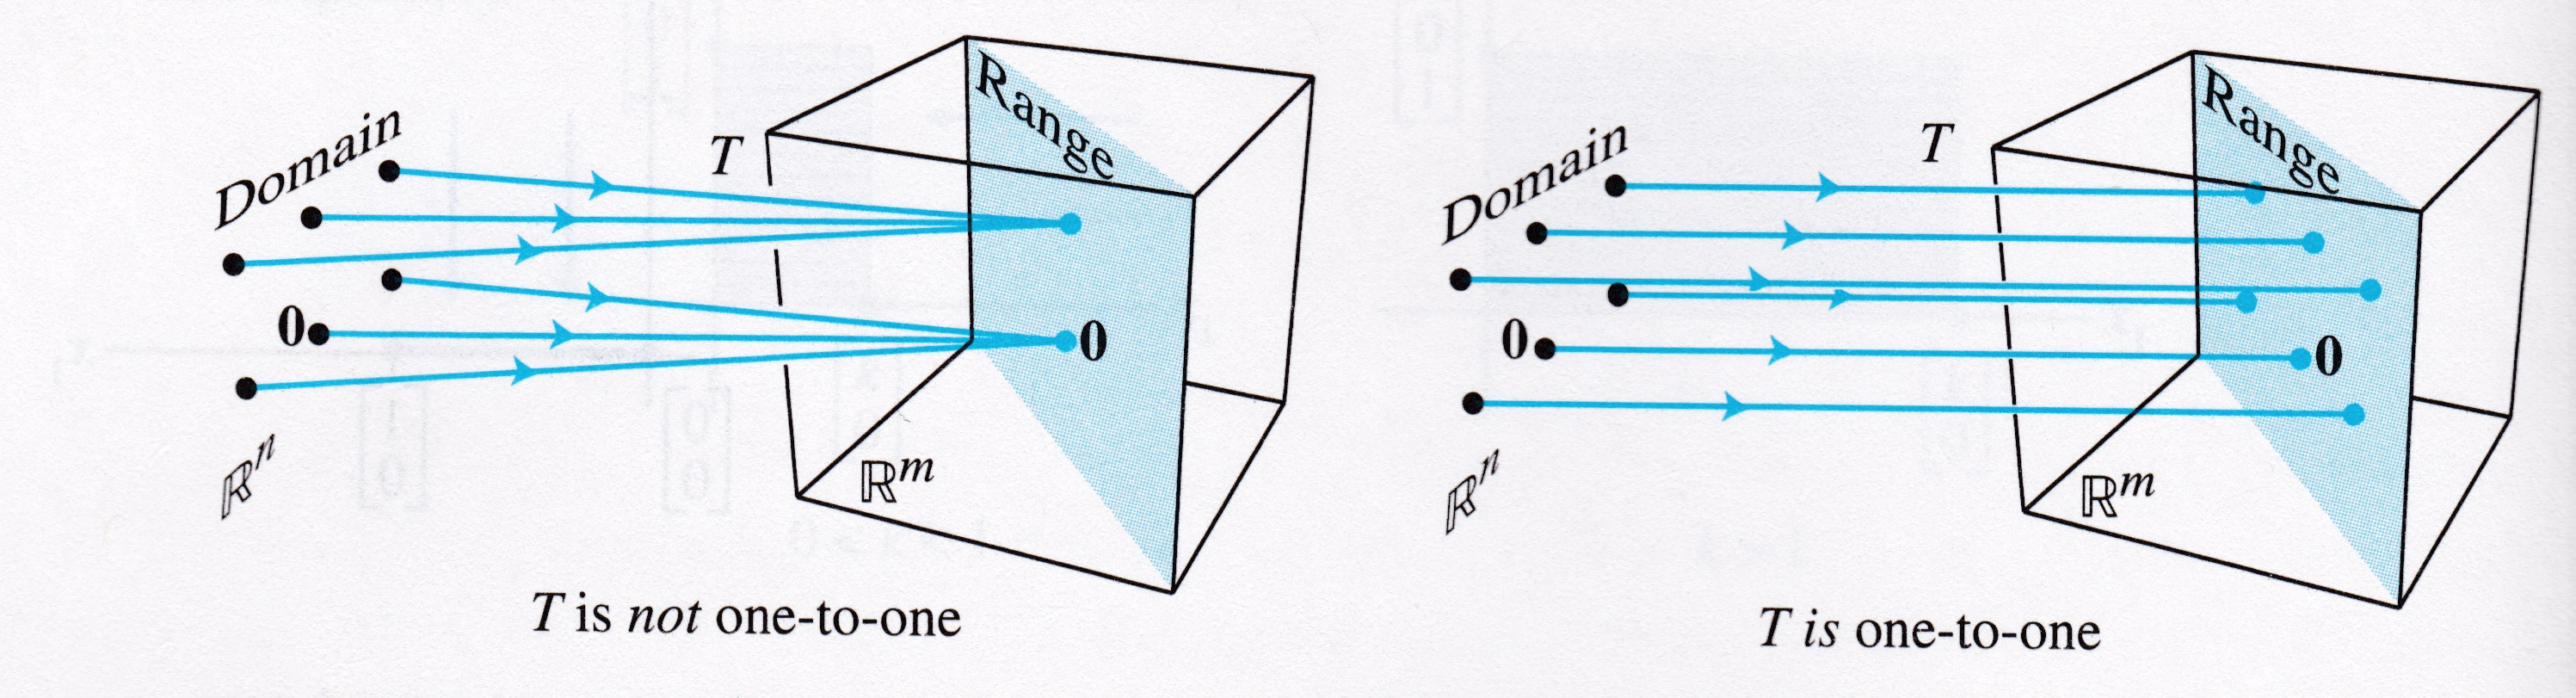

In [42]:
# image credit: Lay, 4th edition
display(Image("images/Lay-fig-1-9-4.jpeg", width=650))

Let's examine the relationship between these ideas and some previous definitions.

If for all $\mathbf{b}$, $A\mathbf{x} = \mathbf{b}$ is consistent, is $T(\mathbf{x}) = A\mathbf{x}$  onto?  one-to-one?

* $T(\mathbf{x})$ is onto.   $T(\mathbf{x})$ may or may not be one-to-one.  If the system has multiple solutions for some $\mathbf{b}$, $T(\mathbf{x})$ is not one-to-one.

If for all $\mathbf{b}$, $A\mathbf{x} = \mathbf{b}$ is consistent and has a unique solution, is $T(\mathbf{x}) = A\mathbf{x}$ onto?  one-to-one?

* Yes to both.

If it is not the case that for all $\mathbf{b}$, $A\mathbf{x} = \mathbf{b}$ is consistent, is $T(\mathbf{x}) = A\mathbf{x}$  onto?  one-to-one?

* $T(\mathbf{x})$ is __not__ onto.   $T(\mathbf{x})$ may or may not be one-to-one.

If $T(\mathbf{x}) = A\mathbf{x}$ is onto, is $A\mathbf{x} = \mathbf{b}$ consistent for all $\mathbf{b}$?   is the solution unique for all $\mathbf{b}$?

* $A\mathbf{x} = \mathbf{b}$ is consistent for all $\mathbf{b}$.  The solution may not be unique for any  $\mathbf{b}$.  

If $T(\mathbf{x}) = A\mathbf{x}$ is one-to-one, is $A\mathbf{x} = \mathbf{b}$ consistent for all $\mathbf{b}$?   is the solution unique for all $\mathbf{b}$?

* $A\mathbf{x} = \mathbf{b}$ may or may not be consistent for all $\mathbf{b}$.  For any $\mathbf{b}$, if there is a solution, it is unique.